# TITLE IMAGE GOES HERE

---

# Executive Summary


## Project Description:

Our team accessed the U.S. Department of Transportation’s database to analyze 8 years of rail accidents across the United States. We utilized the full data science pipeline to analyze the data and create a classification model that would predict which company would be involved in a rail accident.


## Project Goals
- Determine which features are drivers of highway rail accidents and equipment rail accidents.
- Build a classification model for predicting which Railroad operator is most likely to be involved with a given accident. This information is used to enhance the overall analysis.


## Key Findings




---

# Imports and Set-Up

In [3]:
#Imports

#Common Python Libraries
import pandas as pd
import numpy as np

#import stats and testing
from scipy import stats

#Modules we created 
import acquire
import prepare
import explore
import preprocessing

#Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
#Sklearn Tools and Modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

---

# Rail Equipment Data

# Step 1: Data Acquisition
> The data was obtained from the U.S. Department of Transportation:
        > - Data includes U.S. rail accidents from 2012-2020 for equipment and highway rail accidents <br>
        > - Data Structure: Two data frames, one for Highway Rail Accidents and the other for Rail Equipment Accidents 

## Acquire - Rail Equipment Data

In [6]:
#Acquire data using acquire.py module and get_equiprail function
df = acquire.get_equiprail()
#Preview the shape of the acquired dataframe 
df.head()

,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,...,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV,Unnamed: 145
0,12,5,BNSF,GC0512102,NaN,NaN,NaN,NaN,12,5,...,0.0,29.755900,-95.293100,1,1,G,NaN,NaN,NORTH SHORE,NaN
1,12,5,BNSF,GC0512105,NaN,NaN,NaN,NaN,12,5,...,0.0,29.500571,-95.597089,2,5,Z,NaN,NaN,GALVESTON,NaN
2,12,2,NS,98074,12.0,2.0,CSX,100906,12,2,...,NaN,34.612981,-86.988133,1,1,B,NaN,NaN,ALABAMA,NaN
3,12,5,BNSF,GC0512106,NaN,NaN,NaN,NaN,12,5,...,0.0,31.446576,-96.207606,2,5,Z,NaN,NaN,HOUSTON,NaN
4,12,5,BNSF,GC0512112,NaN,NaN,NaN,NaN,12,5,...,0.0,29.772155,-95.384013,2,5,Z,NaN,NaN,HOUSTON,NaN


**Takeaways:**

---

# Step 2: Data Preparation

> **Our approach:**
    > - lkjdlsakfjalsd


## Prepare - Rail Equipment Data

In [7]:
df = prepare.prep_equip_df(df)
df.shape

(11504, 35)

**Takeaways:**

---

# Step 3: Data Exploration

> **Our approach:**
    > - Split the data to explore on the training data set
    > - Run univariate, bivariate, and  multivariate visulaizations for how features interact with each other and the target, railroad_company
    > - Run statistical tests to help answer questions that arose from exploration

## Explore - Rail Equipment Data

### Univariate Exploration - Rail Equipment 

In [8]:
cat_vars = ["railroad_company", "train_type", "cause", "typrr"]
quant_vars = ["accident_type", "state", "temp", "visibility", "weather", "train_speed", "train_direction", 
             "train_weight", "equip_damage", "track_damage"]

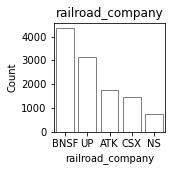

     railroad_company  Count  Percent
UP               BNSF   4345    37.77
BNSF               UP   3160    27.47
NS                ATK   1774    15.42
CSX               CSX   1482    12.88
ATK                NS    743     6.46
_________________________________________________________________


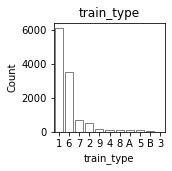

  train_type  Count  Percent
1          1   6122    53.22
7          6   3522    30.62
8          7    696     6.05
2          2    501     4.36
6          9    194     1.69
A          4    128     1.11
5          8    102     0.89
4          A     87     0.76
9          5     86     0.75
B          B     63     0.55
3          3      3     0.03
_________________________________________________________________


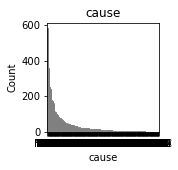

     cause  Count  Percent
H702  H503    582     5.06
M302  T111    548     4.76
T110  M404    474     4.12
H307  T314    356     3.09
T207  T102    345     3.00
...    ...    ...      ...
H512  E77L      1     0.01
H99E  E75L      1     0.01
H104  H699      1     0.01
E13C  H104      1     0.01
E7BL  E81C      1     0.01

[326 rows x 3 columns]
_________________________________________________________________


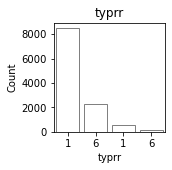

  typrr  Count  Percent
1     1   8487    73.77
1     6   2274    19.77
6     1    567     4.93
6     6    176     1.53
_________________________________________________________________


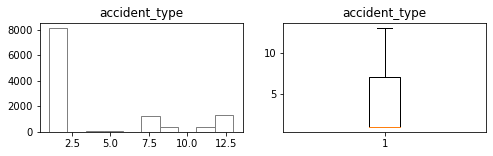

count    11504.000000
mean         3.546506
std          4.204409
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max         13.000000
Name: accident_type, dtype: float64


TypeError: unsupported operand type(s) for /: 'str' and 'int'

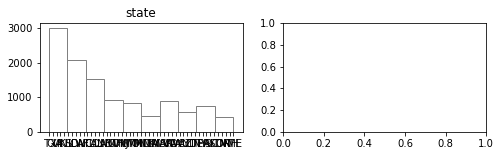

In [9]:
explore.explore_univariate(df, cat_vars, quant_vars)

### More Univariate Exploration - Rail Equipment 

In [10]:
cat_vars = ["railroad_company", "train_type", "cause", "typrr"]
quant_vars = ["total_killed", "total_injured", "max_speed", "total_damage", 
              "engineers_onduty", "conductors_onduty", "brakemen_onduty", "region",
             "signal_type"]

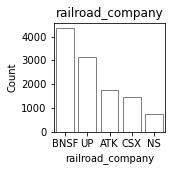

     railroad_company  Count  Percent
UP               BNSF   4345    37.77
BNSF               UP   3160    27.47
NS                ATK   1774    15.42
CSX               CSX   1482    12.88
ATK                NS    743     6.46
_________________________________________________________________


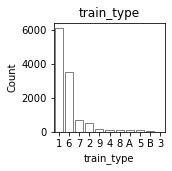

  train_type  Count  Percent
1          1   6122    53.22
7          6   3522    30.62
8          7    696     6.05
2          2    501     4.36
6          9    194     1.69
A          4    128     1.11
5          8    102     0.89
4          A     87     0.76
9          5     86     0.75
B          B     63     0.55
3          3      3     0.03
_________________________________________________________________


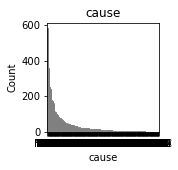

     cause  Count  Percent
H702  H503    582     5.06
M302  T111    548     4.76
T110  M404    474     4.12
H307  T314    356     3.09
T207  T102    345     3.00
...    ...    ...      ...
H512  E77L      1     0.01
H99E  E75L      1     0.01
H104  H699      1     0.01
E13C  H104      1     0.01
E7BL  E81C      1     0.01

[326 rows x 3 columns]
_________________________________________________________________


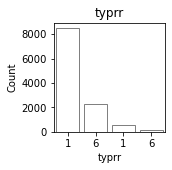

  typrr  Count  Percent
1     1   8487    73.77
1     6   2274    19.77
6     1    567     4.93
6     6    176     1.53
_________________________________________________________________


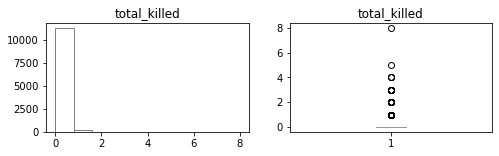

count    11504.000000
mean         0.023818
std          0.205013
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: total_killed, dtype: float64


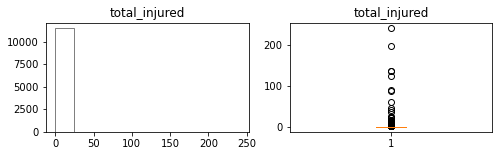

count    11504.000000
mean         0.229833
std          3.959022
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        241.000000
Name: total_injured, dtype: float64


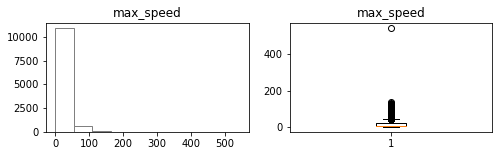

count    11504.000000
mean        15.516951
std         19.524555
min          0.000000
25%          4.000000
50%          7.000000
75%         19.000000
max        545.000000
Name: max_speed, dtype: float64


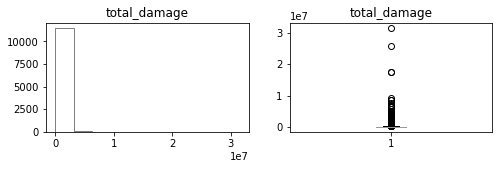

count    1.150400e+04
mean     1.625800e+05
std      6.325089e+05
min      3.200000e+01
25%      1.770250e+04
50%      3.319850e+04
75%      9.010125e+04
max      3.153875e+07
Name: total_damage, dtype: float64


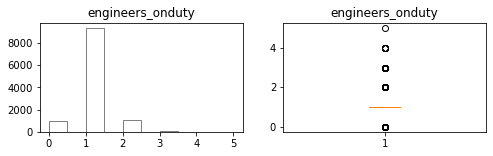

count    11504.000000
mean         1.022427
std          0.467701
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: engineers_onduty, dtype: float64


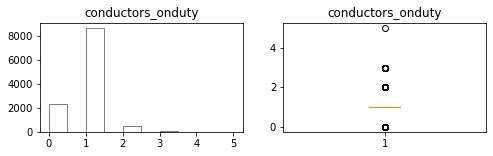

count    11504.000000
mean         0.844750
std          0.480039
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: conductors_onduty, dtype: float64


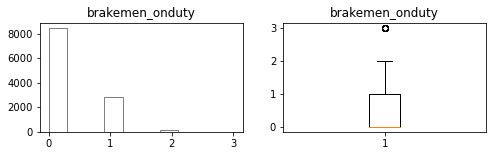

count    11504.000000
mean         0.283032
std          0.491291
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: brakemen_onduty, dtype: float64


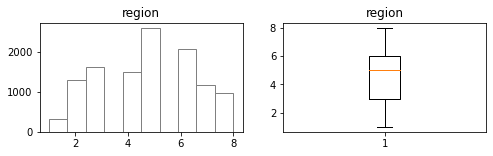

count    11504.000000
mean         4.775643
std          1.856542
min          1.000000
25%          3.000000
50%          5.000000
75%          6.000000
max          8.000000
Name: region, dtype: float64


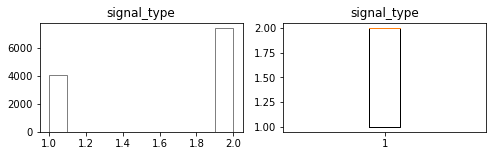

count    11504.000000
mean         1.647340
std          0.477819
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: signal_type, dtype: float64


In [11]:
explore.explore_univariate(df, cat_vars, quant_vars)

**Explore Outliers**

In [12]:
def outlier_report(df):
    '''
    This function takes in a data frame and returns
    print statments stating the upper and lower bound outliers for 
    each column
    '''
    
    columns_to_check = ["temp",
                        "train_speed",
                        "train_weight",
                        "equip_damage",
                        "track_damage","total_killed", "total_injured", "max_speed", "total_damage", 
                        "engineers_onduty", "conductors_onduty", "brakemen_onduty"]
    
    for col in columns_to_check:
        quartile_01, quartile_03 = np.percentile(df[col], [25, 75])
        iqr = quartile_03 - quartile_01
    
        lower_bound = round(quartile_01 -(2 * iqr), 3)
        upper_bound = round(quartile_03 +(2 * iqr), 3)
    
        #df['outlier'] = df[col].apply(lambda x: outlier_label(x, lower_bound, upper_bound))
    

        print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

In [13]:
outlier_report(df)

The lower and upper bound of the range for 'temp' respectively is: -26.0 and 144.0
The lower and upper bound of the range for 'train_speed' respectively is: -26.0 and 49.0
The lower and upper bound of the range for 'train_weight' respectively is: -13366.0 and 20049.0
The lower and upper bound of the range for 'equip_damage' respectively is: -67789.75 and 126031.5
The lower and upper bound of the range for 'track_damage' respectively is: -54594.5 and 82034.25
The lower and upper bound of the range for 'total_killed' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'total_injured' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'max_speed' respectively is: -26.0 and 49.0
The lower and upper bound of the range for 'total_damage' respectively is: -127095.0 and 234898.75
The lower and upper bound of the range for 'engineers_onduty' respectively is: 1.0 and 1.0
The lower and upper bound of the range for 'conductors_onduty' respectively is: 1.0 a

In [14]:
def visualize_outliers(df):
    '''
    This function takes in a dataframe
    and outputs boxplots to show outlier distribution
    for each column in the the dataframe
    '''
    cols_to_check = ["temp",
                    "train_speed",
                    "train_weight",
                    "equip_damage",
                    "track_damage","total_killed", "total_injured", "max_speed", "total_damage", 
                    "engineers_onduty", "conductors_onduty", "brakemen_onduty"]
    for col in cols_to_check:
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

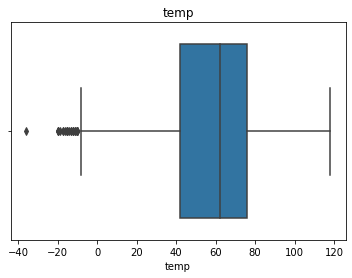

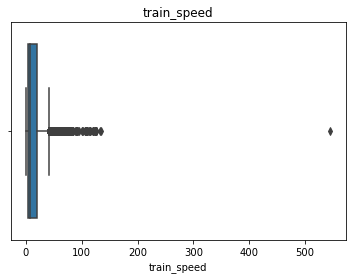

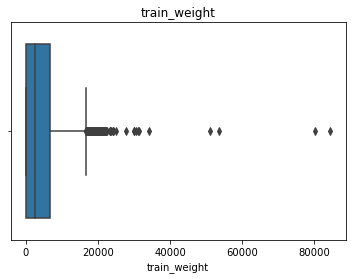

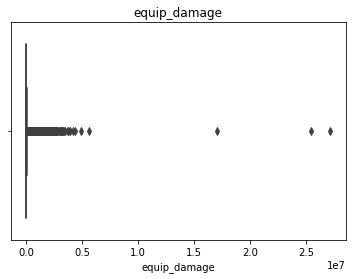

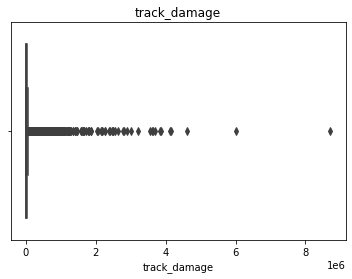

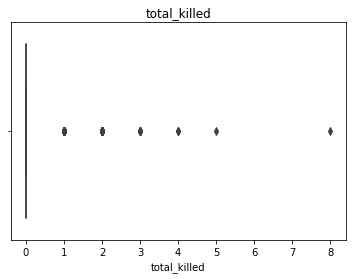

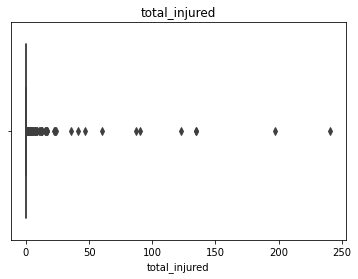

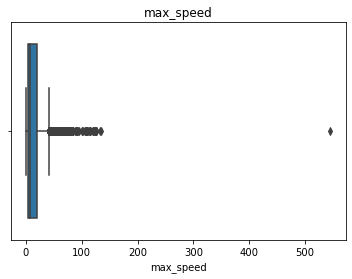

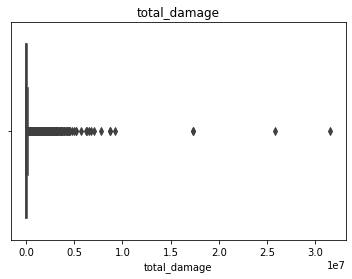

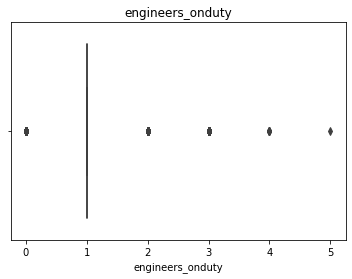

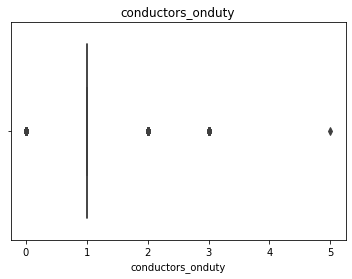

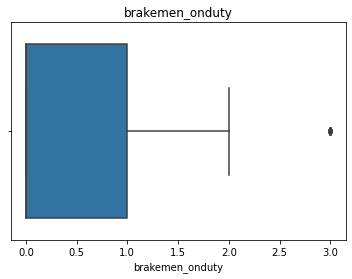

In [15]:
visualize_outliers(df)

**Takeaways:**
   - Need to investigate outliers in:
        - max_speed & train speed...one over 500 mph
        - train weight
        - one super negative temp

**Split the Data**

In [16]:
train, validate, test = explore.train_validate_test_split(df, 'railroad_company', seed=444)
print(f'Train Shape: {train.shape}')
print(f'Validate Shape: {validate.shape}')
print(f'Test Shape: {test.shape}')

Train Shape: (6442, 35)
Validate Shape: (2761, 35)
Test Shape: (2301, 35)


**Is there a time of year where rail equipment accidents happen with more or less frequency?**

In [17]:
train['month'] = pd.DatetimeIndex(train['date']).month
train.head()

,railroad_company,accident_type,state_fips,temp,visibility,weather,train_speed,train_direction,train_weight,train_type,...,region,typrr,lat,long,signal_type,date,season,state,year,month
4593,UP,1,6,71,4,1,17,1.0,6256,1,...,7,1,35.266963,-118.62303,1,2018-08-12 03:45:00,Summer,CA,2018,8
114,UP,13,48,26,4,1,8,4.0,7800,4,...,5,1,32.776391,-96.733497,1,2012-01-12 23:15:00,Winter,TX,2012,1
1490,BNSF,1,48,32,3,6,6,4.0,3335,7,...,5,1,35.114695000000005,-101.86079000000001,2,2019-01-18 18:00:00,Winter,TX,2019,1
8756,CSX,7,21,45,1,1,23,2.0,1278,1,...,3,1,37.580026000000004,-85.904015,1,2017-02-06 04:28:00,Winter,KY,2017,2
185,UP,7,48,85,2,2,35,2.0,2161,1,...,5,1,29.996036,-95.396197,1,2012-06-15 09:20:00,Summer,TX,2012,6


<AxesSubplot:>

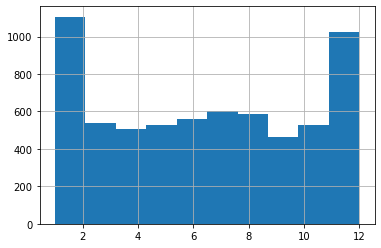

In [18]:
train.month.hist()

In [19]:
train['season'] = train.month.apply(lambda x: "winter/fall" if x == 10 or 11 == 12 or x == 1 or x == 2 or x == 3 else "summer/spring")
train.head()
        

,railroad_company,accident_type,state_fips,temp,visibility,weather,train_speed,train_direction,train_weight,train_type,...,region,typrr,lat,long,signal_type,date,season,state,year,month
4593,UP,1,6,71,4,1,17,1.0,6256,1,...,7,1,35.266963,-118.62303,1,2018-08-12 03:45:00,summer/spring,CA,2018,8
114,UP,13,48,26,4,1,8,4.0,7800,4,...,5,1,32.776391,-96.733497,1,2012-01-12 23:15:00,winter/fall,TX,2012,1
1490,BNSF,1,48,32,3,6,6,4.0,3335,7,...,5,1,35.114695000000005,-101.86079000000001,2,2019-01-18 18:00:00,winter/fall,TX,2019,1
8756,CSX,7,21,45,1,1,23,2.0,1278,1,...,3,1,37.580026000000004,-85.904015,1,2017-02-06 04:28:00,winter/fall,KY,2017,2
185,UP,7,48,85,2,2,35,2.0,2161,1,...,5,1,29.996036,-95.396197,1,2012-06-15 09:20:00,summer/spring,TX,2012,6


<AxesSubplot:>

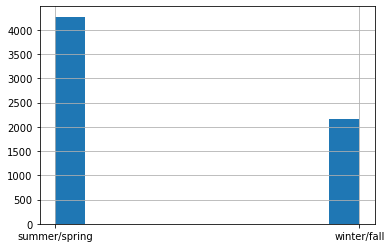

In [20]:
train.season.hist()

**Takeaways:**
- Rail equipment accidents appear to happen more frequently in summer/spring months than in winter/fall months 

**What is the distribution of track damages?**

<AxesSubplot:>

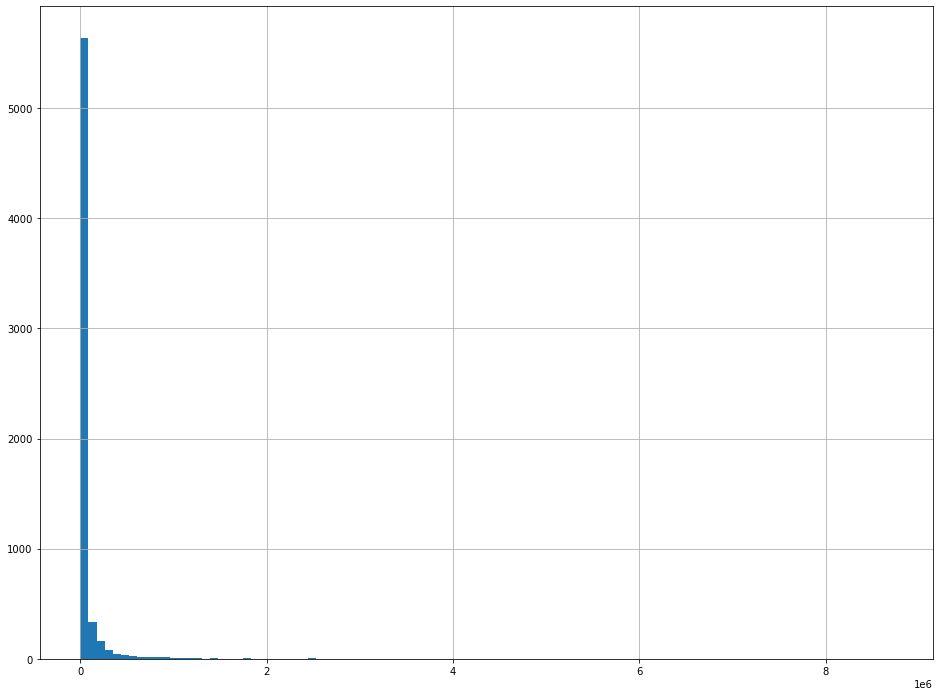

In [21]:
plt.figure(figsize=(16,12))
train.track_damage.hist(bins=100)

---

**Explore Bivariate**

In [22]:
def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, 'railroad_company', cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, 'railroad_company', quant)


### Univariate

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='white', edgecolor='grey')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='white', edgecolor='grey')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats
    
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


#### Bivariate

def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
   # p = plot_cat_by_target(train, target, cat_var)
    
    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    #plt.show(p)
    print("\n_____________________\n")

def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")

## Bivariate Categorical

def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

#def plot_cat_by_target(train, target, cat_var):
#    p = plt.figure(figsize=(2,2))
#    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
#    overall_rate = train[target].mean()
#    p = plt.axhline(overall_rate, ls='--', color='gray')
#    return p
    

## Bivariate Quant

def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

def plot_boxen(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.boxenplot(data=train, x=target, y=quant_var, color='lightseagreen')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

# alt_hyp = ‘two-sided’, ‘less’, ‘greater’

def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)

In [23]:
#Breakdown the features by categories for Univariate and Bivariate Functions from Explore Module
categorical_target = 'railroad_company'
cat_vars = ["train_type", "cause", "typrr"]
quant_vars = ["accident_type", "state", "temp", "visibility", "weather", "train_speed", "train_direction", 
             "train_weight", "equip_damage", "track_damage"]

train_type 
_____________________

          chi2  p-value  degrees of freedom
0  5275.704178      0.0                  40

observed:
 railroad_company  ATK  BNSF  CSX   NS    UP   All
train_type                                       
1                   1   929  515  577  1409  3431
2                 274     0    1    0     0   275
3                   2     0    0    0     0     2
4                   6     4    1   13    26    50
5                   0     5   18    3    34    60
6                   1    14   63   20     9   107
7                  37   631  212  310   762  1952
8                  47   121   17   60   152   397
9                   2    50    0    0     2    54
A                   9    15    3   10    39    76
B                  37     1    0    0     0    38
All               416  1770  830  993  2433  6442

expected:
              0           1           2           3            4
0   221.561006  942.699472  442.056815  528.870382  1295.812325
1    17.758460   75.55883

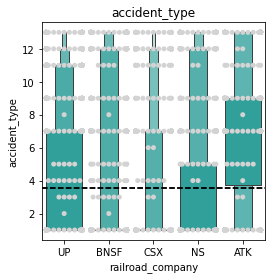

                   count      mean       std  min   25%  50%  75%   max
railroad_company                                                       
ATK                416.0  7.158654  4.199119  1.0  3.75  7.0  9.0  13.0
BNSF              1770.0  3.155367  4.129358  1.0  1.00  1.0  1.0  13.0
CSX                830.0  2.890361  3.693803  1.0  1.00  1.0  1.0  13.0
NS                 993.0  3.382679  4.275373  1.0  1.00  1.0  5.0  13.0
UP                2433.0  3.580764  4.193921  1.0  1.00  1.0  7.0  13.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

state 
____________________



TypeError: Could not convert  CA TX TX KY TX GA TN CA TX AZ IL WY IA AR CA WA MO OH TX KS CA OR IL NE AZ AR TX CO AL CO IL TX AL WY CA LA CA MT TN CA OR NY WV TX TX OK TX WA IL TX PA MI WA NM CA IA AZ CA IL CA OK TX MN IL WY NE TX CA KS SC MS IL VA IA TX WA MD LA MS IN TX LA OH NE TX CO IL NE KS WI MN OR IN MN IN IN TX VA TX WI NE IA NE AR AZ NM GA AL LA TX TX ID WY OH TX IL IL MS CA VA GA MO WI WV IL VA OH ND IL OR CA IL CA IA SD WV KY NE TN AZ CO KS PA MN NJ FL VA LA KS TX WI CA MN TX IL IL CO KS TX TX IN IL WI NE TX NE GA IL NY NV OH CA NV OK KS MA TX WI OH AR PA IL TX MN TX WY TX GA TX MO CA NE TX TX TX WI AL IL NM TX IL LA CA OK VT IN TX ND TX TN TX NY GA TX WY SC IL FL CO NC GA CA CO NM IL NE IL IL IA IA LA IL CA TX TX GA WI TX PA SC IL WA KY IA TX KS MN NE AL AR AL TX TX MN NE CA GA NC TX NM TN IN IN PA MN IL IL MD CO TX VA OH IL SD OR LA WA ID IA AL CA CO NE TX IL IL LA NE CA GA IA OK IN PA LA IL IL KS VA CO PA TX GA WY NE NM WY AR CA TX OR UT WY NE TX TX TX TN AL NY AL AL SD TX WV KS AL IL IA WY NM ID CA SC NM VA DC CA AZ TX TX OH AR NE TX CO OH TX NC WV UT KS DC WA TX NJ WY SC MA IL LA CA NE IN TN NY MN TX KY SC PA IL CA CA TN AL WA NC NE CA KS WA AR NE SC AL NE GA ND NM DE WA MO NE TX IN MA MO WA NE IL MS MN PA PA LA IL OH GA IL TX WA NC MD KS TX NE CO KS TN AL WV MN OH CT TX TX MN KY KS NM NE AR OR TX MN CA IN MO MO CA OH TX AL TX KS NE ND NC IN NE CA IA AL AR TX IL MN MN GA MN MD PA KS IN NE NV MO VA CA CA GA OR TN NJ AL OK WV CA NM AL TX TX TX TX TX OH NE IL IL NE OK TX IL OH KY IA LA PA TX MI TX TN OK CA NE OH AR MO VA TX WA TX TX TX TX MN CA IL CA TX TX IN NE DC NE CO VA WV IL NE KS TX NV GA GA WV FL UT KS IA TX WY CO IL GA IL MO MT OK MT WY VA TX TN TX MN MN TX ND TX NM OK AL TN IL MO TX IL SC CA CO MS TX PA MO TX MO MA KS GA CO MT WV NE IL IA CA OH TX CA CA GA TX KY KS VA AL CO CA IA OK NM MN AZ NE NY MT NV MI TX TX CA TX TX KS OH IA IN TX OH OK DC IA TX NE TX WY NE IL TX AR IL OH CO MN TN CA NM TX IA IA OH NE IA AR TX CA TN MI TX VA CA CT CA MS MD LA MO CA IL UT VA OH AR KS TX NE TX WY IL DE IN KS IL NC IL PA NE OK MO WA IN IN OH NV GA NC IL IL CA NE TX AL TX MN WV CA GA UT TX OR MT PA SD OH WA OK TX GA CA DC OH TX NY FL NC NE WA MN CA AR MO AL NY MO MA UT AR OR MN DC AL PA NY AL NJ KS CA IN NE GA CA NE NJ IL TX IN IN IL NC UT AL OH AL TX LA TX AR NV LA TX OH KS NM PA NM TX MO KS IA ID GA NM MO ID IL OR LA ND IA OR PA IA OR OH CA TX MO IL VA TX MO CA LA MO MN TX DE AZ MT TX CA KS MI IL AL IN WI IL IA AL NM TX IL CA WI NE WY SD KS MO CA OH AZ IL NE OR NE OH CA PA MO CA NE GA ID MD TX CA TX PA UT IN IL NE IL PA TX IL FL GA IL TX TX PA OH IA TX AL TX MN IL TX OR NM AL DE SC FL OH UT OH IL TX OH AL CA GA KS IL IA CO TX AR NE VA TX DC MO OK IL MD IA OH TX AR WY TX WY LA IN TX WA KS TX NC NE PA VA IL TX TX IA IL TX MT KS CA OR SC CA TX TX OR ND FL TX IN TX CA AL IL AR VA CA NC TX TX VA TX CA PA CA IL MN LA IA TX SC PA MO TX MD AZ CA TX PA NM OR CA OR KS WA CA WY IN NE NM OH VA IA MN OH CA LA VA TX OH IL KS TX PA TN WV IA IL TX WA KS LA NE MA IA IL WY IL AZ WA TN MT MT IA AR WY MA OH KS OR ND IL IN OH AZ IA DE NC SC OH CA NE GA KS KS TN OH OR LA CO CA CA CO FL UT OH TX DE KY IL MT MT WY AL LA MT GA PA LA AR WV MT FL TX LA SC KS MT NJ WV TX NC MO SC MO LA MS TX NE CA LA TX KS MN IL OH TX TX IL IL MD NE KY IN SC OH MD UT CA WY GA TX OR PA IL IL MN TN WY WY OR TX NE TX ID IN WY IL OH TX IL IN IL AZ KY SC TX AL AZ IL PA KS CO TX TX TX LA OR UT OH FL IA LA NV IN OH AR ID NE VA OH NM MO IL NC OH NE LA PA UT LA MO KS TX FL TX TX OR NE MN CA KS IL KS KY PA NC PA MN TX SD NE TX IA IL TX GA NM TX CA KS PA CA IL IL OK TX CA TX WA MT NV KS MO OK TX MO IL KY AL NY UT ND PA PA PA TX MN WY NY NE TN TN KS TX CA WV NE TX CA UT OH IL IL KY CO KS OH TX NE OH IA NC OK MN VA CA WY AR PA NE CA OR MO DE ND GA CO UT IL TX WY TX IA IA TX AR MO DE TX CA NY CT CA VA CO NY MN NY WY NE MD TX TX TX ND WA FL IL CA CA KS WA TX IL PA WY CA OK WY IL NC IL MO TX WA TN OK TN CA OK TX MO OH AR LA AL MO PA NE TX TN WA TX NM CA CA AR NE IL TX DE TX WY NE OH CA OK TX NY PA TN MO TX IL WA GA CA KS GA NM NE PA WY IL OR UT VA TX KY MT TX OH IN IL PA TX TX AZ IL IL CO IL FL MN IN IL GA TX VA OR SC WI IL CT NE CA CA NE MA OR WY KS LA LA IL IL TX MD TX MN OR LA GA OR NE MD RI AR KY UT MD IN CT OK TX CA AL AR TX CA TX CA AL TX IL NC CO TX KY CO IA WI MN MI AR TX TX MD WA PA CA TX AZ WA TX OH NE TX IA TX MN TN LA AL CO OK ID TX OH ND TX IL TX IA GA CA GA NE FL IN IL GA OK TX SC FL AR OH KY PA KS CA MD TX OK LA ID MO GA GA CA IN AR MO GA MO CA DC NE CA MO IL IA NE GA UT TX MO AR NM IL CA TX WV CA NE OH NJ CO PA TX OH TX NE ID CO MN CA PA OK NY IN TX TX AR NJ NY TX ND TX WY WA TX NY UT TN MD CO NE WY IL GA TX ID AR PA CA AR TN PA AL OH CO OK OH AL AL PA AZ WV IL VA IN MO TX FL GA IA GA FL IL MO PA AZ IN CA WI DE AL AL WV MN CA MO WI NE CA IL AR MO AZ TX TX WY NJ VA IN KY WA AR MO OH IN CA WY ID IL MN TN IN CO MO NM TX OH AR TX WA CA TN KS TX NE IL IA WV PA SC NY IL TX AL WA WI PA KS IL NC CA AL NC TX TN OH AZ SD WY WA TX VA LA TX TN NM NJ IL TX MO NE IL GA IL TX IL IA OH KS VA TX IA TX TX GA TX IA OK TX AR OK AL TX TX PA ND IL IL MA AR WI OR IN OK TX CA TX NE NM PA WI WA NE OH WY TX NC NE PA AL NV MD OK IL TX KY NM WY CA MD SC WV GA OH CA TX NY OR OK MN GA GA NY MN TX CA TX KS WY MN WY TX UT IL AL AZ IL TN TX GA TN WY IL NE OK MO AR NE TX IL FL CA NM KS KS TX SD OK OR TX NC MT MA TX IL MN TX KY IL AL KS CA NM NY OK IL KS OH TX NY MN TX VA TX IA TX GA AR MT IA TX TX LA TX WY OK TX WI KS NE NY GA IN NE NC NE NE IL LA AR IN PA CA WY VA TX MO KS TX MO TX LA MT NY WA PA MO CO VA TN CA GA WA MN LA IL DC TN OH WA NY TX TN MN NC TX AZ KS SC OK OR CA WV MO IL KS IL GA GA NE TX IN GA DE WA MO IN NY FL IL OR TX FL NV CA LA OH WA TX OK MN TX TX ID CA OH FL NV IA CA PA GA CA TX WV KS WA MI OH AZ MN NM CA NC GA WV VA PA PA NY PA ID FL TX NC CA NE OH PA TX TX MD TX TN OH IA TX NE MA OH WY MD TX MN IN IL FL NE WV MN TX SC AR CA IA TX ND KS UT WI CA NJ WI FL AL IL OK CA CA TX CA MN NE KY OH WY KS WA MS NE CA PA ND OK NY IL AR CA NC KS TX WA IA TX MO IL MO TX OK IL OR MI TX OH TN TX UT CA TX TX WA NC FL IL LA WV MN IL NE KY AR TX IN NE GA TX MD OK GA SD VA IN TN NE NE SD MN CA PA AL TX CA MO AR NE NM WV IL TX CA VT TX OH NY OH MN TN IL CA ND OH KS TX TN DC CA FL WA PA IA IL KS MO UT NE CA TX DC LA TX MD CA TX NE IL ID NE IL TX IA IN MO OH WY FL PA IL CA TX DC TX TX MO UT IL VA KS ID MS WI TX NE IL CA MO AL OH AZ TX WY UT VA WY GA WA MO WV SC NY TX IA AL TX TX WA NY PA TX IL MO KY PA IL NC CA IL OH GA MN PA CA CA UT IN CA IL MI MN VA CO TX TN VA OH CA TX TX SD ID TX OR GA NE IL LA WY MO WY AR NM NE CA CO MN MT KS CA OK PA NE NE PA CO UT VA CA OR OH LA AZ NY AR NM WI TX TX KY IN IL TX NE CA WY AL KY CA MD NE OK TX MN TN CA AZ NE CO WI KS CA CA IL ID OH NE GA SC IN OK NE CO LA TX AR LA MO TX TX AL GA IL NE AL TX AL AL IL TX CA GA ID KS NY TN LA NE ND CA MN AL OR WI KS ID WA TX IA TN UT IL OR UT AL OH WA IA IA KS MN MD AL TX TX VA LA IA NC WI CA AL KS PA CO IA TX WA TX MO TX NV KS KY CA IL ID CO CA AR CA AR TX AR MO MD NY IL TX NE GA VA IL TN CA VA IL PA CA AL SC MN PA IN KS IN VA PA CO PA NM TX TX MS VA TX LA UT SC VA IN TX CO IL PA VA PA TX NE VA OK CA IL IL NE KY SD AL TX VA CO OH IL WA WA KY VA TX RI CA TN TX AR AZ TX ID NY KY MT CA TX NE WA IL IL OK TX PA GA TN UT AR NC GA IL DC TX CO MN NE OH IL NY NE TN DC IL MN NE TX AR TX ID IL TX TX IN IN UT IA IL IL NJ IL AL TX ID MD WA NE KS TX TX IN LA IL CA OK IN IL IA OH ID CA WI LA NE TX NY NJ IL WA ID TX IL WI NE MD NY UT KS CA NY OH TX OK IN OH NE ID MO NC WA TX IL NV NJ TX IN AZ IN AL WV OH GA OH TN NY KY KY TX OR GA SD WI NE KS GA IA CT KS AZ KY IL MD VA TX GA NE WA IL NM NE OH LA MO WY SC NE NE GA KY GA GA AZ TX IA CO AL SC CA IA CA MO IN TX AZ TX MI TX TX AL NE MD MO UT TX VA WA TX DC CA IL KS IL IN PA TX OK LA TX IL AR LA ND WV UT FL GA IA LA WI MO TX IL TX AZ WV GA OH FL LA TN GA TX TX NE TX TX IN TX IL NE KS TX FL AZ TX MT CA IN WA NV CA TX TX IN CA KS TX KS NE TX IN NC OH IL NE MO IA TX NE TX OK NE TX NE FL MO TX AL TX TN IL NE TX OR IN CA MO OR VA FL IA IA NC PA ID SC CO OH WY CA WY OR GA NE VA TX AR PA MT MS IN OR NC NC KS NJ CO CA LA CA PA KS MO PA MN OR TX OR GA IL GA NY WY CA SC PA SC AL IL WV UT MD NE TX TX IL MO KS LA UT CO AZ NE NV TX GA OK MI GA OH CA NE AZ CA TX WA GA CA WI IA OH WA TN AL NV TX TX SC TX IN OH NE TN IL KS TX GA OK VA TX TX TN MS MO WY WV KY WI TX ND MO NV AL CA WA IN IL NC IL MI ID AL MO TX AL CA TX MN KS TX AR LA CA TX TX AZ IL IA VA MN PA MT KS TN AR KS CA IL TX GA IN NC CA AL IA WA WV TN CA NE MT MO NE CT LA UT MI CA TX CA CA TN NE TN LA GA CA OK IL PA IL WY WA IL NV GA GA OH OH VA IN TX IL KS AZ WI TX GA CA VA OH MO IL OR SC NV OH LA WV CA NC AR IN NE TX KS DE IL NE CA NY MO IA IL MS KS TX SC IL IA NC TX AZ TX AR CA OH TX OK AR GA AL NY TN TX MO UT NE IA ID TX NM TX GA OR IL TX MD NE TX TX CA NC MO SC KS OK MN CA NE CA WA WV FL IL CA OR MT WA WA NE OH MN MT SC CA IN OH TX MN TN MT AL UT CO AL MN CO WI PA ID IL SC TX AL WY OH TX TX IL GA GA WI IL MO CA OR CA KS CA GA CA MD IL PA IA TX PA IL GA IA ID IL TN PA SC IA MT TX VA NE WA TX CA TX GA CA KY WA NC NY MO UT IA NE VA VA TX ID KS FL TX CA TN TX NV TX NE VA TX GA NC IL ND GA IL LA NE TX CA IL KS NC GA IA NE OK MT WI MA TX NC GA WI PA MO PA TX CO IL IN MA FL OK AL TX IL IL MO TX CA CA AL OH GA UT MO WA RI IN ND LA VA UT PA LA NE IL SD IL WI OH SC TX TX CA FL IN CO AL AL MN SC NE KY ND AZ MO GA ND MT IL WA GA TX NC GA MI OR TX WY NE LA IA TX MD UT CO CA CA NC TX TN IN AL ID MO CA PA TX WA UT UT VA OH TX TX GA TX LA TX ID MO TX OH MD OR MO MN MT TX IA SC MN IL WI ND CO TX AL IL KS CA CO TX AR MN MT KY OK NE CO NY TX TX TX KY IL WV CA AZ TX IL TX LA MA TX TX AL PA MO NY NE UT LA WI IL MS IL CA OH AR KS CO CA OK PA CA CA TX TN VA TX NY KS SC CA TX VA OR NE GA IA AL CA NE WY TX TX WA TX ND LA GA TN GA WI MO CA IL PA KY NE OH OH IA UT CO NM OH GA WV CA GA TX FL WY NM KY MD MO TX OK SC KS TX WY CA MT TN TX LA TX NE KS AL IA KS IL NC CA CO WV UT NY OK MS MN CO NY MD IL NE TX VA OR CA MO IA TN TX IL OK KS TX TX KS GA OH TN TX NY WA MN IA TX CO CA AL AR WV MT TX MS FL NE KS TN NY KS WV SD WY UT IA TX MD TX ID WY MI FL TX NY TX IN TX PA TX TX CA TN TX IL TX TX KS IN IL TX LA OH LA IN NE CA MO MO CA KS TX TN IL WA WA WA CO UT DC FL LA OH AL PA LA KS NY TX VA AZ MD IL NV VA WA NY MT KS TX NY CA NC NE IL IA AR OK OR IL KY NE WY OK TX CA IA UT IA NY IL MO CA TX SC MD CO CO TX IL DC ID WV NE TX WY IL AL OR TN IL LA TX MO TX SC IA NC AZ NY NE TX MO AL CA IL AZ GA IN OH MD CA KS CA MN CA GA TX TX CO PA TX PA OH NM AL MT CO WI MS UT TX ID AR AL KS WA OR OH ND WA TX LA MO TX NJ GA VA PA KY IL WY IL GA WA IN NE OR TX CA KY NE WA NY GA CA MS LA AL NJ VA AL TX WY PA IN CA CA TN KS CA IL GA WY TX CA FL GA TX NE OK TX MO NC TN NE GA LA MO GA MO MO WI CA TX NV CA TX NY TX IA PA PA IL KS IN CA PA NE TX MO CA IL OK VA TN TX NE TX TN CO OH TX IL NY AZ IL AR KS MI KS FL GA GA IL IL TX GA TX GA WA KY NY AZ NE NE TX CA MN TX LA CA KS VA TX CA FL NE PA NC WI TX VA TX SC IL TX TX NE IL AR NJ IA IL IN NV CA IL MO CO NC IN MI PA LA AR OH MO TX TX IN VA UT WI AZ AL CO MO NE NE WA NE TX MO CA SC NC IL CA UT TX TX NJ TN OR MT TX TX IA NE CA PA OK CO FL NC PA KS TX TN WY IN OH CA MN VA TX CA NC ID IL FL TX CA VA PA MN MN CO TX WI VA OK OK NE NE TX TN KS OK WA ID NC LA NM IL GA MD IL OH TX KS GA IN OR TN TX NM SC WA TX AR WV IA MA CA ND TX OH MN CA CA ND IL WY DC IL AZ OH VA TX WV PA GA IA TX WY TX IA NC IL TX OR VA MT GA WY OK CO TN MN IA IL PA AR NV WA MN PA AR KS TN MD LA MO WA KS IL IL IL TX GA OH TX WY TX IL ND TX PA CO NV PA PA DE OH OK MO TX AZ TX IL GA CA VA CA CA KY MO VA PA NE GA KS IL IL CT IL TX AR TX VA KY TX CA NE MD TN AR GA KS IN LA TX CO CO MD CA OH TX TX LA AL OK SD UT MO NC MS OK IL LA GA IA NE AZ TN IL TX ID CA CA NE IL ND IN IL NC CA CO AZ OH CO OK IL AR AZ TX OH TX MO VA CO MI TX TX MO LA NM TX OK OR MT DC TX VA TX LA TX TX TX IN VA NC NC DE CA MO IA NE TX CO MD NE NE MO MS SC MN IL IL PA TN KY TX MN TX ND NE TX OH AZ KS NY CA TX IL TX TX MN IL MN IL AL KS NE IL MN TN TX GA VA SD NE NV LA TX CA IA CA LA IL WY TN OK TX IA NE TX NE AZ NE TX TX KS MO PA MA MN MD OK AR IL TX TX TX AR TN TX CA OH TX CA VA IN SC WY ID NM ID MN CA CA WI PA NE MO IL TX CA WA TX TX VA KS MS WA IL NY TX IL PA TN IL IN MO MD AR CA NE CA OR CA MN TX CO VA TX TX CA TN TX MT MN TX ND TX MN MT NC IN TX WV CA NE TN AR NE OK KY MT IL TX IL PA TX IN IL NE WA GA SD IL OH CA IA TX UT IN CO ND MT ID OK FL CA NE KS NE IL GA SC NE KS MN LA AZ PA NM TX MO NC AL NV IL OK NJ TN WY TN OK KS CA IN TN IN TX TX GA UT FL TX NY IA TX OK TX GA AL NM MD CA IL CA VA LA MT NE IN OH PA PA KS MI NE LA PA TN VA KS IL IL MI GA TX FL MO GA IL TN TX MD VA TX OK TN TX WV OK KS ND OH TX CA KS AL CA NE NE NE FL TX TX IL LA IL TX CO OK TX WA MN OK MN TX TX CA MN NY MN OH VA NC IL LA CO CA PA TX OK TX CA MO FL CT IL PA LA MO MD WA UT CO NC TN TN DE MN AL IN NJ NE TX IL WA NC NJ TX TX MO NE IL TX NM KS AL IN CO AR NE MD WY IL OK GA SD SC VA MS MD NJ PA IN FL TX IL KS IA NC MO WA TX LA CA TX GA CA AL CO CA NY CA NE WA OK IN TX TX MN VA CA TX MS CA AR IA AZ IL MO NC TX NV NC VA CA MO OH AZ TN AR TX OK IN IN UT LA CA IL NE WY CO FL MN MN IA MN MT NY TX IL CA PA GA NC OK WA AL FL TX NE NE IL TN VA CA NY CA MI TN IA TX CO TX WA TX NE LA MT AL GA MT MS IN TX AL KS TX NY LA NM NE CA MO AR OH CA IL MT CA CA NE MO NE CA MO WV LA TX IN OH IL TX IL FL WY CA MN OH FL OH OK TX WV AR AL OK CA UT SD UT TX MN IA GA CA TX CA KY KS IL MN TX VA WA WA OK NE CA NC OK SD GA PA TX TX KS CA MD NE VA IA CO WA AL AL TX WI AL IL OR AL WA IL AZ NM MN NE AL SD IL VA PA CA WV UT MO OH OH NJ ND AR IN IL OH IL WV OH CO IL PA AL IL KY MO TX CA NY AR CA IL ND KS IL TX CA TX MO CA TN TX KS CA MO AL TN IL KS KS IL MO OH AZ TX OH TX CA IL GA SC OH AL TX WY TX NM MO IL NY MN VA CA TX DC TX NC VA CA LA TX OK TX OK MS TN MT CO IA WI TX TX MN TX IL MD WV TX TX PA WI TX AZ GA AR TX AL GA NE IA FL TX LA IL CA CA TX KS OK CO CA IL TX OR NV MD TX PA TX IL WV NY NC IN FL VA CA TX IL NE OK IA GA WY CA CA LA OK GA AL TX WV AR OR WA PA TX CO SC ND TX AL UT TX TX IL KY NE NY NE OR AR TX IL NM NY IL OK NY WA VA SD AL IL TN KS AR NY CA TX LA MN TX TX IL WY KS NE PA IL NE MN TX WA IL TX CO IA TN IL ND CO KS NC TX IA TX MN NC IL AL TX CO TX KS CA GA TX PA OK FL CA TX TX IL PA GA PA CA VA TX IL OK TX TX CA CO WY KY WY IN IA TX OH MN OH TX KS PA TX TX GA NE CA NC TX TX ND NY IA CA OH CA CO IA TX MO OH PA GA TX OK LA MO TX ND TN IL WI LA CA MN IN MO CA AL CA KS TX KS TN NE CA ND KS TX UT IA AZ CO NE TX GA CO IL LA TX ND CO IL MI IN CA IA TX CA TX MA TX TX TX IL CA PA LA IL OH OK CA VA IL AZ TX AR TX IL IL OH TX CA OH IL PA TX NE AZ NC IL AZ KS IL AL TX WY TX CA NE TX PA MN WI LA NC IL OK IN TN NY CA WA IL IL AL KS TX IL IL KS OK NM NC MT GA MO KS IL IL WV VA IL KS TX IN GA TN MS CA FL IL DE MT LA AZ KS TX TX MI AR GA IL IL PA IA LA OK UT TX VA IL NE IL IL MO TX TX NC IL TX IA TX IN IL CA OR PA IL NY KS WI CA CO OK MD TN IA DC IN AR WY ND IL AR TX CA NE LA SD WY IL AL NC OK WY AZ CA TX NV OH TX CA PA NE WV AL WY IL NE AL TX IN WY WY CO AL MO TX TX TX TX TX WI IL TX KY WI MO KY NY TX MN WA IL MA PA NE CA IN OR CA KS LA WY MO WI CO CA NY VA MN CT TN WI WV AZ WA TX OR ND TN WA WY CA KY TX WV TN TX AR OH NM OH CO KS CT VA OK NV IA VA IL VA WA TX PA OK MO MD AZ IL GA MN IL NE NE OH PA CA MN NE OK WA AR MO WA KS SD OK NE AL NC LA IL ID TN LA NH NJ TX OR TX TX NE SC CA NE TX TX MO MO IL GA OH VA MD CA MO TX AL TN TX OH VA OR WY UT NE AR KS NC ID MN MN AL NM TX MO TX TX WY GA OH WV AR MS KS WA MO NY MD VA ND TX NE IL PA IL NE CA TX LA IL MO AR IL TX LA IL TX PA OH OK WA PA OH CA WY AL ID OH IL IL TX ID MD IA NC MO TX KS ND KY PA OK SC LA MD IL NC IL IN NM PA OH OK FL LA MT WY TX CO AR NE KS MI SC FL TX KS OH OH OR SC MO PA KS MS IL WA GA IN OH TX FL AL AR CA CO MN OH CA OH SC UT CA NE TX CA AL MO WV LA WY IL TX WY KY MD NM CA TX TX KS CA IA OH MT TX MO TX MO KS OR CO CA MN OH NY WA WY VA CA TX OH TX WA TX UT AL TN GA KS OH PA NE WV ID AR WI IN ID AL WI TX IL TX TX GA TX MD WY DE LA NE KS FL CA IN MN AL GA IN KS IL TX TX FL WY TX FL NE TX CA NE OH WA UT VA OH KS TX TX CO CA ID CO MN WI CO MD TX OH IA LA AL NJ TN VA NM UT MO NY CA AL PA GA CA WY KS OH NE KS UT OR MO DC CA CA IA OK NM NE IA TN OH IL KS ND CO VA MO AL NV TX UT TN NE TN SC CA MT TX CO IL MO TX TX GA NE AL NC OH IN GA IN PA CA TN ID WV AL NM IL IN KS WA WA SC WY TX MO AR KS VA AL TN OR OK OR MN OH NE IL FL PA TN IN OK AL IL NE TX TX AL UT WY TN TX TX KY WY AZ AL TX AZ LA TX NE ND MO MT TX MO AZ AL KS NE NE NE MT WY TN WV MS MN IL OH TN TX NE OH IL WY NE NE CA IL TX WV FL MN FL IL NC NC NE TX ID TX NE IL NM WA NC AL MO IL OH KS TX AL AZ IN PA MA GA UT WI IA CA CA IN KS GA TX WY NM WA IL MT NY KS LA AR WA CA CA LA NC MO TX IL WA LA KY WY ID OR AR IL LA OR IA IN TX AL PA CA TX NC TX LA WY NE TX OH TX TX NV IN DC TX AR AL CA VA CA PA GA OH MN MO ND UT NC CA OK CO GA OR KS TX SD MO IA NE MN WA OK NC OR CA SC CA IN WY KS TX KS KY CA CA SC NC TX KY IL IL TX TX SC OR LA NE AL AZ MO IL KS MO TX AR OH IA WY IN NM IA PA DE IL TN TN OH TX TX WV NV WA VA TX GA AR GA AR MS MO VA OH TX SD NV AR KS IL WV MO LA GA NE CO GA MO NY OH CO NY NE TX AR GA NM TX AL PA KY TX CA AL GA IN CO MD IN SC OK AL WA PA CA TX NC LA NJ AR PA AR SD LA TX VA MS LA MO WA NY AL IA VA MN MN LA UT IL TX IN VA IA TX TX VA WY PA OH WI DC TX NM IA NY NE NV MT NE MI NM WA GA MO IL UT TX KS TX IN OR WI CO KS CO WY TN NM NC NE MN AR OK NE TN TX TX IA WA IL MO TX IL IA IL WA TX CA TX IL NC VA ND TN TN MD TN CA PA KS MN IL PA IA TX MA AR KY RI OR CA TX MS OK NM PA VA NE TX CA CO IL TX NM UT AL CA CA WY NJ PA CA OK OK LA TX TX AR TX KS TX PA AL IN LA OR TX CA IL NM OK WY ID CA FL MO NY IA TX PA KS MT TX TX IN MO TX LA MI NE UT MT LA NE IL NM NY MA TX IL IA AR MA NC WA MN DC NM NE ND FL OH CA CA CA WA WY MT TX OK CA NM TX SC SC GA WA VA NE LA TN PA IL OR TX NV AR IL TX MN VA MO CA MO UT KY OK IL TX SC TX IA GA TX IA WI CA IL GA CA TN MO TX GA PA CA MN LA CA IL OH TX NM NE CA OR LA VA LA TX MO NJ AL NH TN KS IA IL IN TN WY ID UT OR PA OH KY OH NY TX NC OK AZ MN PA IL MO IA TX OK MO UT MT VA TN IL OH NC KS IL TX MO MO ID UT GA MD KS SC MT CA LA NE WY KS TX NE IL OH TX AL NV MI WA TX IL TX LA ID CA TN IL NJ MT NE KY IL PA IL WY ND KY OK PA NC WI NY CO GA OH MN NE NV PA MT CA UT MN TX GA TN IL WY TX TX AL GA GA NC UT IL IN MN GA OH OH OR VA TX MT KS GA TX AL DC LA KY TN TX VA LA VA WI GA IN AL AL MS IN IL TX GA IN AZ MO AZ CO KY KS TX CA TN TX CA IN MO OK IN NE MO AR OH NE WV CA TX SC OH AZ SC WY UT TX CA OK CA OH KS TX IA TX VA OH NM TX AR OR AR IN TX NE OK IL OH CA KS AL IL OH GA AZ OK GA SC SD TN AZ MN TX GA TX OH PA LA ND NC NM GA AL WV NY CA OH GA IL CO CO ID TX NC IA IL AR TX NM ID NM GA LA FL AR VA VA TX KY SC OR TX CA PA MO CA IA NJ CA AR TX MO WV AR ID KS AR AL CA DE TX TX DE AR PA TX WA FL PA VA WV OK LA VA RI WI TX IL CT WY IL TN IL TN GA TX VA CA TX TN AL KS AR NY TX TX VA IA CA KY WA AR CO IL PA OK CA MO IA NE CT IN NE SC UT KY NE ND ND GA UT TX ID NM TX KS TX PA AL TX VA CA TX IL NY MN IL MD KY IL WV MO KS KS NE DE NE PA TN MI ND IA NM TN TN OK TN TX WY MI MA NV IN MS MO TX TN IL TX IL DE GA TX WA VA CO KY OK TX PA GA CA NJ MO MO LA WA OH AZ FL CA TX KS NC WY TX CA LA OR TN IA LA TX MN IL TX IL MS MN ND MN IN IL NE MT IL KS IN CO MO AL MN TX KS IL PA IA CA TX KS CA KS WY MO TN LA AL NE NE KS OH CA SC TX IN TX CO IA KS GA AZ WY CA TX OH IL MN IL AR WY TN TX KS TX IN CA TX OH TX TX PA IL OK NV IL PA KS LA TX VA LA MS MN MS PA NE NE to numeric

In [24]:
explore_bivariate(train, 'railroad_company', cat_vars, quant_vars)

**How do total damages compare by railroad?**

<AxesSubplot:xlabel='railroad_company'>

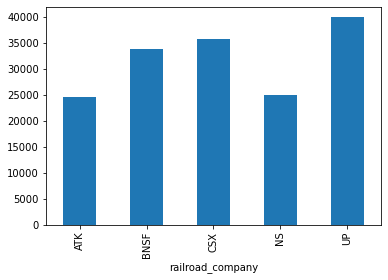

In [25]:
train.groupby('railroad_company').total_damage.median().plot(kind='bar')

**Takeaways:**
   - UP equipment accidents result in higher median total damages
   - Temperature spread is varied by railroad...Is this beacuse certain railroads operate in more specific climates?
   - Accident type should be a categorical value
   - Amtrak trains travel at higher speeds than other Railroads
   - BNSF accidents seem to incur > track damages on average
   - Amtrak incidents are missing train weight data

---

**Equipment Multivariate Exploration**

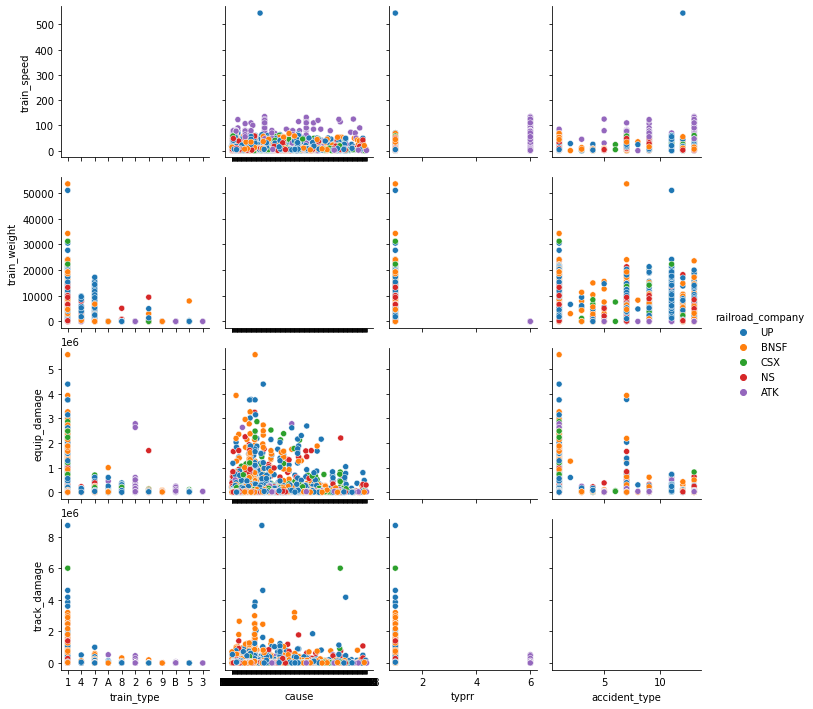

In [26]:
sns.pairplot(data = train, hue = 'railroad_company', 
             x_vars = ["train_type", "cause", "typrr", "accident_type"],
             y_vars = ["train_speed","train_weight", "equip_damage", "track_damage"])

**Takeaways**
   - Amtrak trains go faster than non amtrck trains.
   - Pairplot seems to confer that BNSF equipment accidents result in > track damages. 

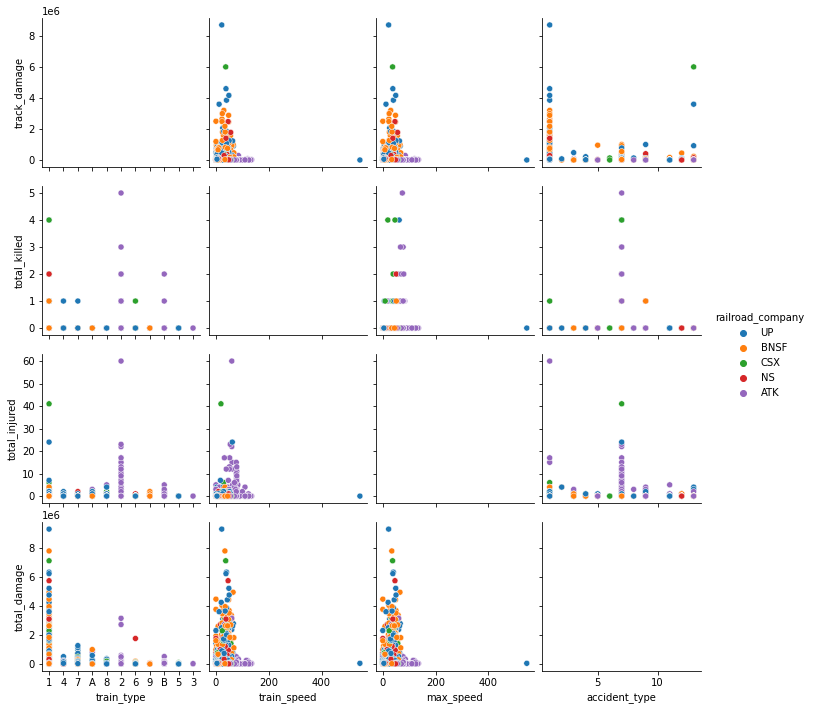

In [28]:
sns.pairplot(data = train, hue = 'railroad_company', 
             x_vars = ["train_type", "train_speed",
                        "max_speed", "accident_type"],
             y_vars = ["track_damage","total_killed", "total_injured", "total_damage"])

**Takeaways:**
   - Amtrak seems to be the exception for the observation that the > the train speed, the > the track damage.
   - Conversely, the greater the train speed for an Amtrak train, the > total_injured
   - Equipment rail incidents result in higher rates of injuries than in deaths

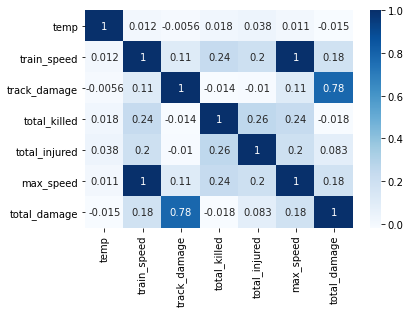

In [29]:
sns.heatmap(train[["temp", "train_speed","track_damage","total_killed", "total_injured", "max_speed", "total_damage"]].corr(), cmap='Blues', annot=True)
plt.show()

**Takeaways**
   - The most interesting thing here is that total_injured is fairly correlated with total_damaged

## Questions from Exploration to Explore With Statistical Testing

**Do Amtrak Equipment Incidents Result in Higher Track Damages than other Railroad Equipment Incidents?**

I am using a mann-whitney u test to analyze this due to the fact that track_damage is not normally distirbuted<br>
**H<sub>o</sub>: Amtrack equipment accidents do not result in higher track damages than other Railroad equipment accidents.<br>
H<sub>a</sub>: Amtrack equipment accidents do result in higher track damages**

In [30]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that track_damage is not normally dist
confidence_interval = 0.95
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].track_damage
x2 = train[train.railroad_company != 'ATK'].track_damage

#Run the test
t, p = stats.mannwhitneyu(x1, x2)

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:569325.0 and the p-value is 6.4078095189497e-79
We reject the null hypothesis.


**Do Amtrak Equipment Incidents Result in Higher Total Damages than other Railroad Equipment Incidents?**

I am using a mann-whitney u test to analyze this due to the fact that total_damage is not normally distirbuted<br>
**H<sub>o</sub>: Amtrack equipment accidents do not result in higher total damages than other Railroad equipment accidents.<br>
H<sub>a</sub>: Amtrack equipment accidents do result in higher total damages**

In [31]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_damage is not normally dist
confidence_interval = 0.95
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].total_damage
x2 = train[train.railroad_company != 'ATK'].total_damage

#Run the test
t, p = stats.mannwhitneyu(x1, x2)

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:1039086.5 and the p-value is 2.5812714233842062e-09
We reject the null hypothesis.


**Is train_speed a effective feature for classifying railroad involved in an equipment accident?**

In [32]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_damage is not normally dist
confidence_interval = 0.95
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].train_speed
x2 = train[train.railroad_company != 'ATK'].train_speed

#Run the test
t, p = stats.mannwhitneyu(x1, x2)

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:594889.0 and the p-value is 1.0204494650439974e-72
We reject the null hypothesis.


**Is train_type related to railroad?**

Chi Squared Test for examining the relationship between two categorical variables<br>
**H<sub>o</sub>: Train type is independent of railroad.<br>
H<sub>a</sub>: Train type has dependent on railroad.**

In [33]:
observed = pd.crosstab(train.railroad_company, train.train_type)
observed

train_type,1,2,3,4,5,6,7,8,9,A,B
railroad_company,,,,,,,,,,,
ATK,1,274,2,6,0,1,37,47,2,9,37
BNSF,929,0,0,4,5,14,631,121,50,15,1
CSX,515,1,0,1,18,63,212,17,0,3,0
NS,577,0,0,13,3,20,310,60,0,10,0
UP,1409,0,0,26,34,9,762,152,2,39,0


In [34]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[   1  274    2    6    0    1   37   47    2    9   37]
 [ 929    0    0    4    5   14  631  121   50   15    1]
 [ 515    1    0    1   18   63  212   17    0    3    0]
 [ 577    0    0   13    3   20  310   60    0   10    0]
 [1409    0    0   26   34    9  762  152    2   39    0]]
---
Expected

[[2.21561006e+02 1.77584601e+01 1.29152437e-01 3.22881093e+00
  3.87457311e+00 6.90965539e+00 1.26052779e+02 2.56367588e+01
  3.48711580e+00 4.90779261e+00 2.45389631e+00]
 [9.42699472e+02 7.55588327e+01 5.49518783e-01 1.37379696e+01
  1.64855635e+01 2.93992549e+01 5.36330332e+02 1.09079478e+02
  1.48370071e+01 2.08817138e+01 1.04408569e+01]
 [4.42056815e+02 3.54315430e+01 2.57683949e-01 6.44209873e+00
  7.73051847e+00 1.37860913e+01 2.51499534e+02 5.11502639e+01
  6.95746663e+00 9.79199007e+00 4.89599503e+00]
 [5.28870382e+02 4.23897858e+01 3.08289351e-01 7.70723378e+00
  9.24868053e+00 1.64934803e+01 3.00890407e+02 6.11954362e+01
  8.32381248e+00 1.17149953e+01 5.85749767e+0

**Takeaway:**
- The chi squared test revealed there is likely a significant relationship between the type of train and the railroad.
- Type of train would be a good feature for predicting railroad company, but it may result in too much coliniarity

---

**What features should be carried over to modeling for Equipment Rail Accidents?**

**Rail Equipment Univariate Takeaways & Questions:**
- Outlier in train speed? What train travels at 545 mph?
- What is going on with the State column? Expected 50 but shows 56. Are the 6 extra representing terratories in the US?
- Track Damages and Equip damages have outliers which is expected  
- What does signal feature mean? The majority of the equip accidents are classified as not signaled...but what does that actually mean?

# Step 4: Modeling

> **Approach:**
>
> ...

In [36]:
#Acquire the Data
df = acquire.get_equiprail()
df.shape

(22402, 146)

In [37]:
#Prepare the data
df = prepare.prep_equip_df(df)
df.shape

(11504, 35)

In [48]:
equip_df = df[['track_damage', 'total_damage', 'weather', 'equip_damage', 'railroad_company']]
equip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11504 entries, 0 to 11503
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   track_damage      11504 non-null  int64 
 1   total_damage      11504 non-null  int64 
 2   weather           11504 non-null  int64 
 3   equip_damage      11504 non-null  int64 
 4   railroad_company  11504 non-null  object
dtypes: int64(4), object(1)
memory usage: 539.2+ KB


In [50]:
#Split the Data
train, validate, X_train, y_train, X_validate, y_validate, X_test, y_test = preprocessing.train_validate_test(equip_df, 'railroad_company')

In [51]:
X_train.shape

(6442, 4)

In [52]:
y_train.shape

(6442,)

In [53]:
object_cols = preprocessing.get_object_cols(equip_df)
numeric_cols = preprocessing.get_numeric_X_cols(X_train, object_cols)

In [54]:
#X_train_scaled, X_validate_scaled, X_test_scaled = preprocessing.min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [55]:
def min_max_scale(X_train, X_validate, X_test, numeric_cols):
    '''
    this function takes in 3 dataframes with the same columns, 
    a list of numeric column names (because the scaler can only work with numeric columns),
    and fits a min-max scaler to the first dataframe and transforms all
    3 dataframes using that scaler. 
    it returns 3 dataframes with the same column names and scaled values. 
    '''
    # create the scaler object and fit it to X_train (i.e. identify min and max)
    # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).

    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(X_train[numeric_cols])

    #scale X_train, X_validate, X_test using the mins and maxes stored in the scaler derived from X_train. 
    # 
    X_train_scaled_array = scaler.transform(X_train[numeric_cols])
    X_validate_scaled_array = scaler.transform(X_validate[numeric_cols])
    X_test_scaled_array = scaler.transform(X_test[numeric_cols])

    # convert arrays to dataframes
    X_train_scaled = pd.DataFrame(X_train_scaled_array, 
                                  columns=numeric_cols).\
                                  set_index([X_train.index.values])

    X_validate_scaled = pd.DataFrame(X_validate_scaled_array, 
                                     columns=numeric_cols).\
                                     set_index([X_validate.index.values])

    X_test_scaled = pd.DataFrame(X_test_scaled_array, 
                                 columns=numeric_cols).\
                                 set_index([X_test.index.values])

    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [56]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [57]:
X_train_scaled

,track_damage,total_damage,weather,equip_damage
8116,0.003655,0.000850,0.0,0.000004
2539,0.000005,0.002467,0.0,0.002511
10506,0.000033,0.000571,0.2,0.000576
6836,0.013576,0.071481,0.0,0.069471
7873,0.000033,0.001157,0.2,0.001173
...,...,...,...,...
4466,0.001582,0.000807,0.2,0.000451
5250,0.002074,0.000910,0.0,0.000439
9997,0.005115,0.006726,0.2,0.005633
10320,0.000000,0.000887,0.2,0.000905


---

In [58]:
df.railroad_company.value_counts()

UP      4345
BNSF    3160
NS      1774
CSX     1482
ATK      743
Name: railroad_company, dtype: int64

In [59]:
print(f'Baseline Accuracy: {round(max(df.railroad_company.value_counts()) / df.shape[0] *100)}%')

Baseline Accuracy: 38%


**Logistic Regression Model**

In [60]:
#Using the scaled data, make a logistic regression model
lm = LogisticRegression()

#Fit the lm object to the vectorized data
lm.fit(X_train_scaled, y_train)

#Create corresponding dataframes 
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

#Form predictions uisng the lm model
train['predicted'] = lm.predict(X_train_scaled)
validate["predicted"] = lm.predict(X_validate_scaled)
test['predicted'] = lm.predict(X_test_scaled)

#Review how the lm model performed on the in-sample data
print('In-sample data model performance:')
print(classification_report(train.actual, train.predicted, zero_division=0))
print('----------------')
#Review how the lm model performed on the out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(validate.actual, validate.predicted, zero_division=0))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.00      0.00      0.00       436
        BNSF       0.66      0.04      0.07      1769
         CSX       0.00      0.00      0.00       851
          NS       0.00      0.00      0.00       975
          UP       0.38      0.99      0.55      2411

    accuracy                           0.38      6442
   macro avg       0.21      0.21      0.12      6442
weighted avg       0.32      0.38      0.22      6442

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.00      0.00      0.00       181
        BNSF       0.47      0.02      0.05       748
         CSX       0.00      0.00      0.00       339
          NS       0.00      0.00      0.00       432
          UP       0.38      0.99      0.55      1061

    accuracy                           0.39      2761
   macro avg       0.17      0.20      0.1

**Takeaways:**
- The LM model does not improve upon the baseline accuracy.
- What does this mean for the features we selected?

---

**KNN**

In [61]:
#Create the KNN object with a k = 7
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

#Fit the object to the scaled training data
knn.fit(X_train_scaled, y_train)

#Create corresponding dataframes 
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

#Form predictions uisng the knn model
train['predicted'] = knn.predict(X_train_scaled)
validate["predicted"] = knn.predict(X_validate_scaled)

#Review how the knn model performed on the in-sample data
print('In-sample data model performance:')
print(classification_report(train.actual, train.predicted,  zero_division=0))
print('----------------')
#Review how the knn model performed on the out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(validate.actual, validate.predicted, zero_division=0))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.99      0.99      0.99       436
        BNSF       0.97      1.00      0.99      1769
         CSX       1.00      0.99      1.00       851
          NS       1.00      0.97      0.99       975
          UP       1.00      0.99      1.00      2411

    accuracy                           0.99      6442
   macro avg       0.99      0.99      0.99      6442
weighted avg       0.99      0.99      0.99      6442

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.19      0.14      0.16       181
        BNSF       0.35      0.38      0.36       748
         CSX       0.20      0.15      0.17       339
          NS       0.17      0.13      0.15       432
          UP       0.45      0.51      0.48      1061

    accuracy                           0.35      2761
   macro avg       0.27      0.26      0.2

**Takeaways:**
   - Using a K=6 returns the best accuracy score for predicting railroad company
   - Using weights=distance parameter results in overfitting on the train dataset but retains a similar accuracy score on the validate data as the default weights hyperparamter of 'uniform'

---

**Random Forest**

In [62]:
#Create the RF object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

#Fit the RF object to the training data
rf.fit(X_train_scaled, y_train)

#Predict on y
y_pred = rf.predict(X_train_scaled)

#Evaluate
print('In-sample data model performance:')
print(classification_report(y_train, y_pred))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.69      0.37      0.48       436
        BNSF       0.60      0.66      0.63      1769
         CSX       0.76      0.32      0.45       851
          NS       0.84      0.19      0.31       975
          UP       0.58      0.88      0.70      2411

    accuracy                           0.61      6442
   macro avg       0.69      0.48      0.51      6442
weighted avg       0.66      0.61      0.57      6442



In [63]:
#Predict using out of sample data
y_pred = rf.predict(X_validate_scaled)
print('----------------')
print('Out-of-sample data model performance:')
print(classification_report(y_validate, y_pred, zero_division=0))

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.31      0.14      0.19       181
        BNSF       0.36      0.39      0.38       748
         CSX       0.36      0.13      0.19       339
          NS       0.24      0.04      0.07       432
          UP       0.44      0.69      0.54      1061

    accuracy                           0.41      2761
   macro avg       0.34      0.28      0.27      2761
weighted avg       0.37      0.41      0.36      2761



**Takeaways:**
   - Random Forest achieves the highest accuracy score thus far

---

**Decision Tree Modeling**

In [64]:
#Make the CLF object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=9, random_state=123)

#Fit the model on the training set 
clf = clf.fit(X_train_scaled, y_train)

#Make predictions
y_pred = clf.predict(X_train_scaled)

#Evaluate model performance on training data
print('In-sample data model performance:')
print(classification_report(y_train, y_pred))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.59      0.20      0.30       436
        BNSF       0.46      0.51      0.48      1769
         CSX       0.56      0.30      0.39       851
          NS       0.71      0.14      0.23       975
          UP       0.51      0.77      0.61      2411

    accuracy                           0.50      6442
   macro avg       0.57      0.38      0.40      6442
weighted avg       0.54      0.50      0.47      6442



In [65]:
# Predict on validate
y_pred = clf.predict(X_validate_scaled)

# Evaluate model performance on out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(y_validate, y_pred, zero_division=0))

Out-of-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.30      0.09      0.14       181
        BNSF       0.36      0.39      0.37       748
         CSX       0.30      0.14      0.19       339
          NS       0.18      0.03      0.06       432
          UP       0.44      0.69      0.54      1061

    accuracy                           0.40      2761
   macro avg       0.32      0.27      0.26      2761
weighted avg       0.35      0.40      0.35      2761



**Takeaways:**
   - Random Forest algorithm achieves a 42% accuracy on validate data set
   - The Decision Tree algoithm also performs best at being able to predict the individual railroad companies and this is evident from the precision scores. 

---

**Evaluate on Test**

In [66]:
#Predict on y
y_pred = rf.predict(X_test_scaled)

#Evaluate
print('In-sample data model performance:')
print(classification_report(y_test, y_pred))

In-sample data model performance:
              precision    recall  f1-score   support

         ATK       0.27      0.14      0.19       126
        BNSF       0.39      0.41      0.40       643
         CSX       0.35      0.15      0.21       292
          NS       0.36      0.08      0.13       367
          UP       0.45      0.71      0.55       873

    accuracy                           0.42      2301
   macro avg       0.37      0.30      0.29      2301
weighted avg       0.40      0.42      0.38      2301



---

# Highway Rail Data

# Step 1: Data Acquisition

## Acquire - Highway Rail Data

In [70]:
#Acquire data using acquire.py module and get_hwyrail function
df = acquire.get_hwyrail()
#Preview the shape of the acquired dataframe 
df.head()

,AMTRAK,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,...,NARR1,NARR2,NARR3,NARR4,NARR5,SUBDIV,ROADCOND,VIDEOT,VIDEOU,Unnamed: 103
0,NaN,12,3,UP,0312RS009,NaN,NaN,,,12.0,...,HIEHWAY USER'S ACTIONS: STOPPED ON CROSSING ( NO GATES).,NaN,NaN,NaN,NaN,WOODBRIDGE,B,1,2,NaN
1,NaN,12,3,UP,0312RS025,NaN,NaN,,,12.0,...,HIGHWAY USER'S ACTIONS: STOPPED ON CROSSING ( BEFORE GATES DESCENDED). DRIVER ABANDON ...,D LEFT THE SCENE.,NaN,NaN,NaN,FRESNO SUB,A,1,2,NaN
2,NaN,12,10,BNSF,CA1012201,NaN,NaN,,,12.0,...,DRIVER AGE UNKNOW. 41: ABANDONED VEHICLE,NaN,NaN,NaN,NaN,SAN BERNARDINO,A,1,2,NaN
3,NaN,12,10,BNSF,CA1012202,NaN,NaN,,,12.0,...,"12/18/12 PER CONTRA COSTA COUNTY CORONERS REPORT, MANNER OF DEATH RULED SUICIDE.",NaN,NaN,NaN,NaN,STOCKTON,A,1,1,NaN
4,NaN,12,7,BNSF,CA0712201,NaN,NaN,,,12.0,...,NaN,NaN,NaN,NaN,NaN,STOCKTON,A,1,2,NaN


**Takeaways:**

---

# Step 2: Data Preparation

> **Our approach:**
    > - lkjdlsakfjalsd


## Prepare - Highway Rail Data

In [71]:
df = prepare.prep_hwy_df(df)
df.shape

(12181, 51)

---

# Step 3: Data Exploration

> **Our approach:**
    > - Split the data to explore on the training data set
    > - Run univariate, bivariate, and  multivariate visulaizations for how features interact with each other and the target, railroad_company
    > - Run statistical tests to help answer questions that arose from exploration

**Takeaways:**

---

## Explore - Highway Rail Data

In [72]:
df.shape

(12181, 51)

In [73]:
df.railroad_company.value_counts()



UP      2959
CSX     2825
NS      2715
BNSF    2274
ATK      956
KCS      452
Name: railroad_company, dtype: int64

In [74]:
df.season.value_counts()

Fall      3176
Winter    3116
Summer    3093
Spring    2796
Name: season, dtype: int64

In [75]:
df.state.value_counts()

 TX    1631
 GA     751
 IN     727
 CA     698
 AL     583
 IL     518
 OH     516
 LA     492
 SC     361
 NC     359
 KY     355
 PA     352
 FL     344
 MO     343
 TN     342
 AR     307
 OK     293
 KS     277
 VA     275
 NE     274
 MS     216
 WA     199
 MN     182
 CO     165
 MI     157
 AZ     152
 WV     150
 IA     138
 MD     121
 NY     119
 ND     113
 ID     108
 WI      89
 OR      79
 NM      72
 MT      62
 SD      54
 NJ      51
 UT      38
 WY      37
 DE      29
 MA      16
 NV      15
 VT       8
 CT       5
 ME       4
 NH       2
 DC       2
Name: state, dtype: int64

## Takeaway

 - states like Texas, Georgia, Indiana, Alabama, Ohio rank highest in hwy rail accidents while states in the NE like Vermont, Conneticut & DC are at the very bottom.
     - is this because people in NE are more accustomed to trains and people in middle america don't see them as often?
     - Need to look at state populations and compare average accident (i.e., vermont could have 5 people but 2 accidents while Texas could have 28 million people and 1,000 accidents. need to look at the numbers and compare

Initial hypothesis

 - Rail accidents are more prevelant in southern and middle america
     

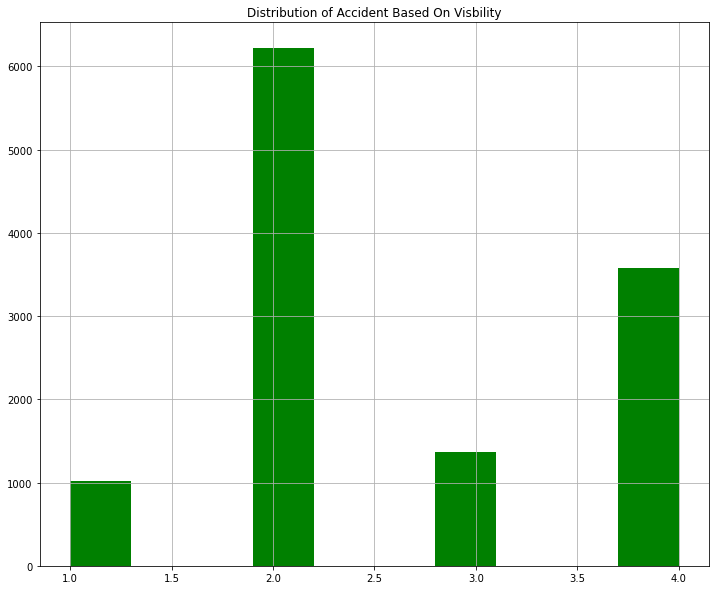

In [76]:
df['visibility'].hist(color='green', figsize=(12, 10))

plt.title('Distribution of Accident Based On Visbility')
plt.show()

----
## Takeaway

Majority of accident happen the day followed by night...not many at dawn or dusk

In [77]:
df.weather = df.weather.astype(int)

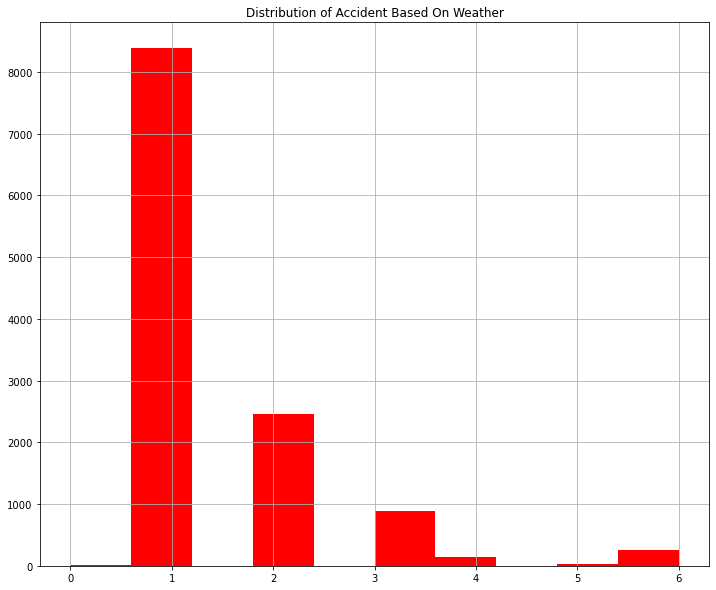

In [78]:
df['weather'].hist(color='red', figsize=(12, 10))

plt.title('Distribution of Accident Based On Weather')
plt.show()

-----

## Takeaway

- Clear weather followed by cloudy skies are when the majority of accidents take place

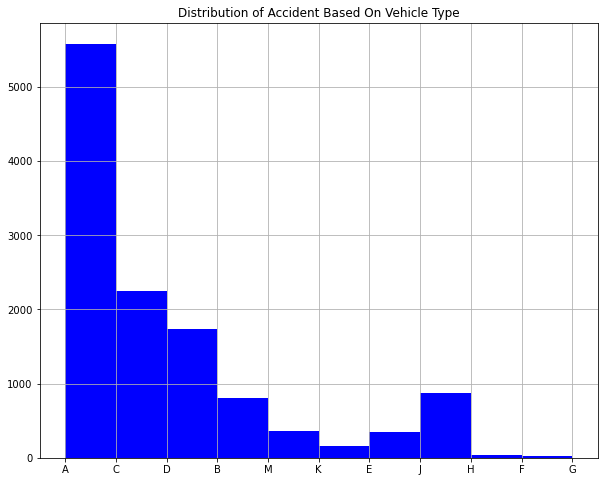

In [79]:
df['vehicle_type'].hist(color='blue', figsize=(10,8))

plt.title('Distribution of Accident Based On Vehicle Type')
plt.show()

In [80]:
df.vehicle_type.value_counts()

A    5585
C    2248
D    1731
J     878
B     804
M     366
E     352
K     156
H      39
F      17
G       5
Name: vehicle_type, dtype: int64


-----
## Takeway
 
 - most accidents are involved with auto(cars) followed by tractor trailers, then pick up trucks. School buses were at the very bottom which was good to see although there were still 5 instances. 

-----------

## OUTLIERS

-------

<AxesSubplot:xlabel='front_engines'>

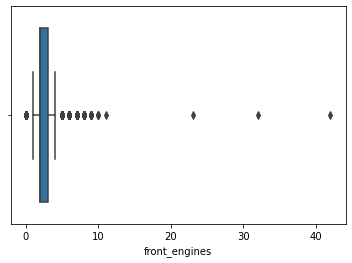

In [81]:
sns.boxplot(data = df, x = 'front_engines')

- Have some crazy outliers with 3 accidents having over 20 engines

<AxesSubplot:xlabel='railcar_quantity'>

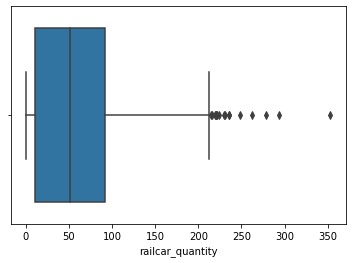

In [82]:
sns.boxplot(data=df, x = 'railcar_quantity')

- majority of railcar quanity is between 0-100 cars but there are some outliers above 200 with one coming in at a whopping 350 cars

<AxesSubplot:xlabel='train_speed'>

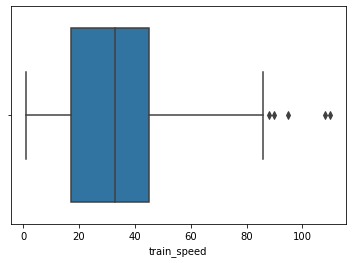

In [83]:
sns.boxplot(data = df, x = 'train_speed')

- train speed outliers above 80 mph, with 2 over 100 mph

<AxesSubplot:xlabel='temp'>

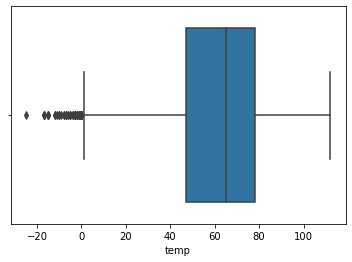

In [84]:
sns.boxplot(data = df, x = 'temp')

- outliers exist for accidents where temp was below 0 degrees with 1 occuring where temp was greater than -20

In [85]:
df.position.value_counts()

3    5578
2    2202
3    1659
1    1589
2     710
1     430
5       6
5       3
4       3
4       1
Name: position, dtype: int64

## Takeaways

- a majority of people involved in accidents were either moving across the crossing when hit or were stopped. A small amount (4 & 5) were either blocked or trapped inside the crossing 

In [86]:
df.road_condtions.value_counts()

A    10133
B     1268
C      430
E      232
D      113
F        5
Name: road_condtions, dtype: int64

## Takeaways

- conditions were dry(A) for a majority of the incidents followed by wet (B) and then snow/slush(C)

In [87]:
df.view_obstruction.value_counts()

8    11794
5       72
3       70
1       69
7       51
6       50
2       46
4       29
Name: view_obstruction, dtype: int64

## Takeaways
- Majority of accidents had zero obstruction while vegetation was next with less than 80 incidents. 

In [88]:
df.motorist_action.value_counts()

3    3768
4    2996
1    1508
5    1485
2     600
3     428
7     388
4     308
5     199
1     195
8     114
2      93
7      58
6      23
8      15
0       2
6       1
Name: motorist_action, dtype: int64

## Takeaways

- Most motorists did not stop for the train (#3) and were hit or they stopped in the crossing(#4) and were hit. After that, people went around gates (#3). Lower on the list were people who went thru the gates(#7) and then those who attempted or committed suicide (#8)

## Takeaway

 - states like Texas, Georgia, Indiana, Alabama, Ohio rank highest in hwy rail accidents while states in the NE like Vermont, Conneticut & DC are at the very bottom.
     - is this because people in NE are more accustomed to trains and people in middle america don't see them as often?
     - Need to look at state populations and compare average accident (i.e., vermont could have 5 people but 2 accidents while Texas could have 28 million people and 1,000 accidents. need to look at the numbers and compare

Initial hypothesis

 - Rail accidents are more prevelant in southern and middle america
     

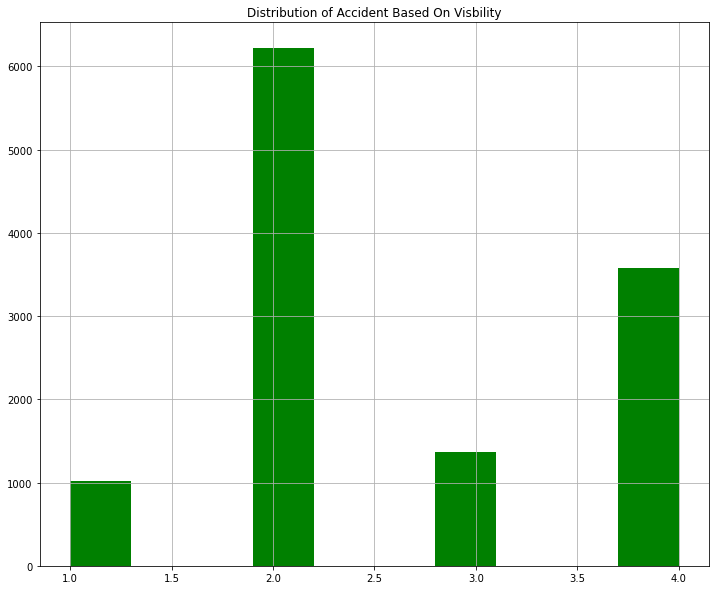

In [9]:
df['visibility'].hist(color='green', figsize=(12, 10))

plt.title('Distribution of Accident Based On Visbility')
plt.show()

----
## Takeaway

Majority of accident happen the day followed by night...not many at dawn or dusk

In [10]:
df.weather = df.weather.astype(int)

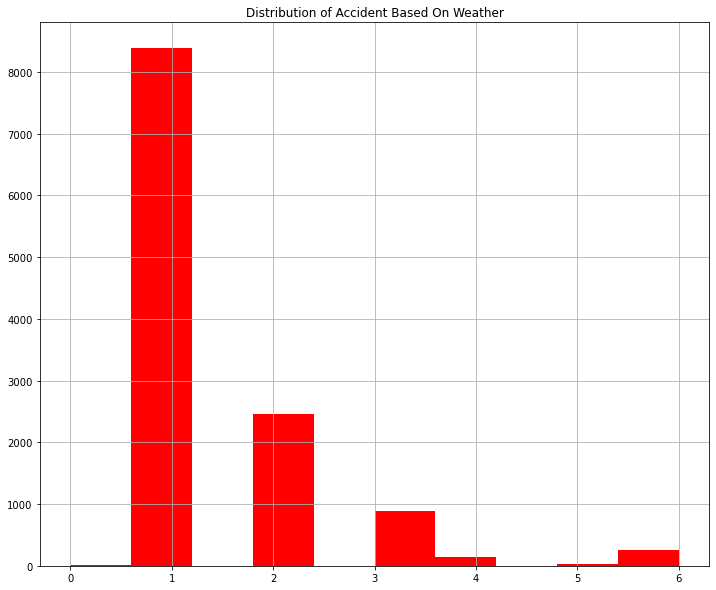

In [11]:
df['weather'].hist(color='red', figsize=(12, 10))

plt.title('Distribution of Accident Based On Weather')
plt.show()

-----

## Takeaway

- Clear weather followed by cloudy skies are when the majority of accidents take place

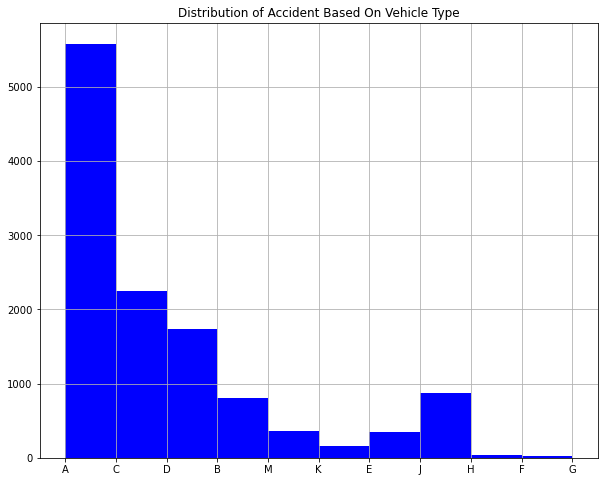

In [12]:
df['vehicle_type'].hist(color='blue', figsize=(10,8))

plt.title('Distribution of Accident Based On Vehicle Type')
plt.show()

In [13]:
df.vehicle_type.value_counts()

A    5585
C    2248
D    1731
J     878
B     804
M     366
E     352
K     156
H      39
F      17
G       5
Name: vehicle_type, dtype: int64


-----
## Takeway
 
 - most accidents are involved with auto(cars) followed by tractor trailers, then pick up trucks. School buses were at the very bottom which was good to see although there were still 5 instances. 

-----------

## OUTLIERS

-------

<AxesSubplot:xlabel='front_engines'>

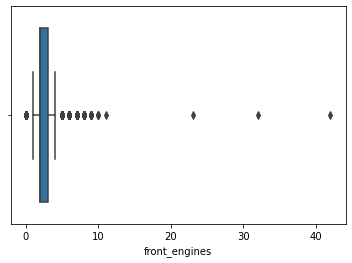

In [14]:
sns.boxplot(data = df, x = 'front_engines')

 - Have some crazy outliers with 3 accidents having over 20 engines

<AxesSubplot:xlabel='railcar_quantity'>

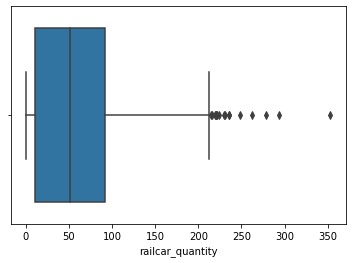

In [15]:
sns.boxplot(data=df, x = 'railcar_quantity')

- majority of railcar quanity is between 0-100 cars but there are some outliers above 200 with one coming in at a whopping 350 cars

<AxesSubplot:xlabel='train_speed'>

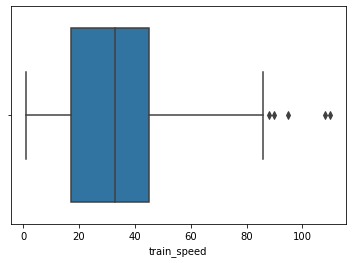

In [16]:
sns.boxplot(data = df, x = 'train_speed')

- train speed outliers above 80 mph, with 2 over 100 mph

<AxesSubplot:xlabel='temp'>

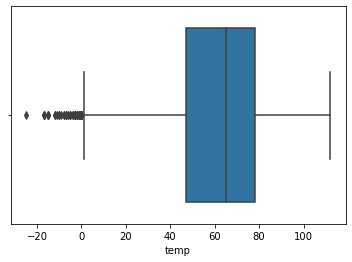

In [17]:
sns.boxplot(data = df, x = 'temp')

- outliers exist for accidents where temp was below 0 degrees with 1 occuring where temp was greater than -20

In [18]:
df.position.value_counts()

3    5578
2    2202
3    1659
1    1589
2     710
1     430
5       6
5       3
4       3
4       1
Name: position, dtype: int64

## Takeaways

- a majority of people involved in accidents were either moving across the crossing when hit or were stopped. A small amount (4 & 5) were either blocked or trapped inside the crossing 

In [19]:
df.road_condtions.value_counts()

A    10133
B     1268
C      430
E      232
D      113
F        5
Name: road_condtions, dtype: int64

## Takeaways

- conditions were dry(A) for a majority of the incidents followed by wet (B) and then snow/slush(C)

In [20]:
df.view_obstruction.value_counts()

8    11794
5       72
3       70
1       69
7       51
6       50
2       46
4       29
Name: view_obstruction, dtype: int64

## Takeaways
- Majority of accidents had zero obstruction while vegetation was next with less than 80 incidents. 

In [21]:
df.motorist_action.value_counts()

3    3768
4    2996
1    1508
5    1485
2     600
3     428
7     388
4     308
5     199
1     195
8     114
2      93
7      58
6      23
8      15
0       2
6       1
Name: motorist_action, dtype: int64

## Takeaways

- Most motorists did not stop for the train (#3) and were hit or they stopped in the crossing(#4) and were hit. After that, people went around gates (#3). Lower on the list were people who went thru the gates(#7) and then those who attempted or committed suicide (#8)

---------------------------

## Train Data/Bi-Variate/Multi-Variate Exploration

---------------------

In [23]:
train, validate, test = train_validate_test_split(df, 'railroad_company', seed=123)

In [24]:
train.shape, validate.shape, test.shape

((6820, 52), (2924, 52), (2437, 52))

In [25]:
train.groupby('railroad_company').railcar_quantity.median()

railroad_company
ATK      7
BNSF    69
CSX     49
KCS     61
NS      40
UP      72
Name: railcar_quantity, dtype: int64

## Takeaway

- UP has largest median railcar length followed by BNSF. Amtrack is smallest at 7 but this is because they are strictly passenger 

In [26]:
train.groupby('railroad_company').train_speed.median()

railroad_company
ATK     65.0
BNSF    35.0
CSX     28.5
KCS     35.0
NS      28.0
UP      35.0
Name: train_speed, dtype: float64

## Takeaway

- Median speed across the cargo carriers was no greater than 35 mph and no less than 28 mph. Amtrak was fastest with a median of 65 mph

<AxesSubplot:xlabel='weather', ylabel='Count'>

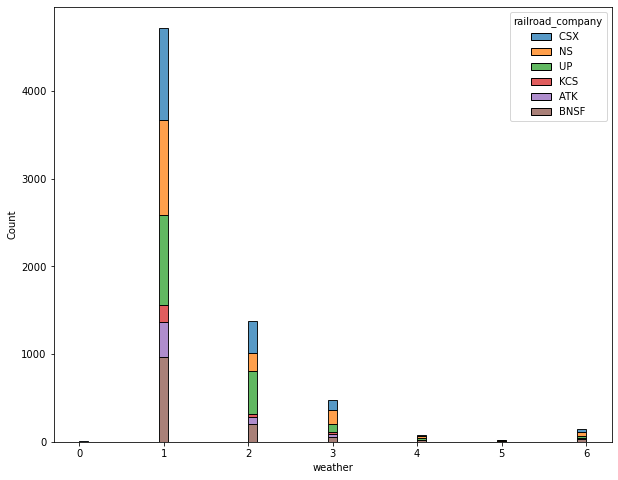

In [27]:
plt.figure(figsize=(10,8))
sns.histplot(data=train, x="weather", hue = "railroad_company", multiple="stack")

In [28]:
train.groupby('railroad_company').weather.value_counts()

railroad_company  weather
ATK               1           403
                  2            82
                  3            35
                  6             9
                  4             5
                  5             1
BNSF              1           964
                  2           201
                  3            53
                  6            30
                  4            19
                  5             6
CSX               1          1048
                  2           364
                  3           110
                  6            38
                  4            12
                  0             6
                  5             4
KCS               1           193
                  2            34
                  3            23
                  4             2
                  5             1
NS                1          1084
                  2           204
                  3           166
                  6            47
                  4   

## Takeaways

- KCS had no reported hwy rail accidents in snow (#6) or sleet (#5) condtions
- BNSF had the third higest total (practically a tie with 2nd (CSX) of snow accidents even though they are 4 out of 6 in total accidents)

In [29]:
train.groupby(['railroad_company', 'weather']).vehicle_damage.max()

railroad_company  weather
ATK               1          150000.0
                  2           60000.0
                  3           15117.0
                  4           15000.0
                  5            5000.0
                  6           10000.0
BNSF              1          140000.0
                  2           25000.0
                  3           10000.0
                  4            5000.0
                  5            5000.0
                  6            5000.0
CSX               0           19100.0
                  1          500000.0
                  2          276000.0
                  3           27500.0
                  4           13800.0
                  5           27500.0
                  6           20500.0
KCS               1           75000.0
                  2           50000.0
                  3           20000.0
                  4            4500.0
                  5            6000.0
NS                1          600000.0
                  2     

## Takeaways

- UP had the highest max property damage in Fog with $100,000 while CSX was the winner with a max in the cloudy department. 

In [30]:
train.groupby(['railroad_company', 'season']).vehicle_damage.median()

railroad_company  season
ATK               Fall      7000.0
                  Spring    5000.0
                  Summer    5000.0
                  Winter    5000.0
BNSF              Fall      2000.0
                  Spring    2000.0
                  Summer    2000.0
                  Winter    2000.0
CSX               Fall      6500.0
                  Spring    6500.0
                  Summer    6500.0
                  Winter    6500.0
KCS               Fall      5000.0
                  Spring    5000.0
                  Summer    5250.0
                  Winter    6500.0
NS                Fall      3000.0
                  Spring    2500.0
                  Summer    3000.0
                  Winter    3000.0
UP                Fall      5000.0
                  Spring    5000.0
                  Summer    5000.0
                  Winter    5000.0
Name: vehicle_damage, dtype: float64

## Takeaways

- Median damages seems to be fairly similar on a median basis when spread through each company basaed on the seasons

In [31]:
train.groupby(['railroad_company', 'season']).vehicle_damage.max()

railroad_company  season
ATK               Fall      100000.0
                  Spring    150000.0
                  Summer    100000.0
                  Winter     90000.0
BNSF              Fall      140000.0
                  Spring     20000.0
                  Summer    100000.0
                  Winter     25000.0
CSX               Fall      100000.0
                  Spring    500000.0
                  Summer    276000.0
                  Winter    500000.0
KCS               Fall       40000.0
                  Spring     50000.0
                  Summer     75000.0
                  Winter     50000.0
NS                Fall      400000.0
                  Spring    100000.0
                  Summer    600000.0
                  Winter    100000.0
UP                Fall      175000.0
                  Spring    150000.0
                  Summer    665000.0
                  Winter    200000.0
Name: vehicle_damage, dtype: float64

## Takeaways

- UP saw its biggest property damage in summer as did NS. 
- CSX had a tie for Winter & Spring as its most expensive damage incidents
- KCS saw an uptick in Summer

<AxesSubplot:xlabel='railroad_company,season'>

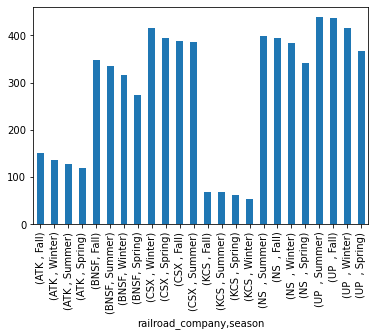

In [32]:
train.groupby('railroad_company').season.value_counts().plot(kind='bar')

In [33]:
train.groupby('railroad_company').vehicle_damage.sum()

railroad_company
ATK      5483435.0
BNSF     3488975.0
CSX     13688313.0
KCS      2567596.0
NS      11115059.0
UP      17808328.0
Name: vehicle_damage, dtype: float64

## Takeaways

- Amtrak, a passenger carrier, had a higher vehicle property damage than BNSF and KCS
- UP leads the pack followed by CSX and NS

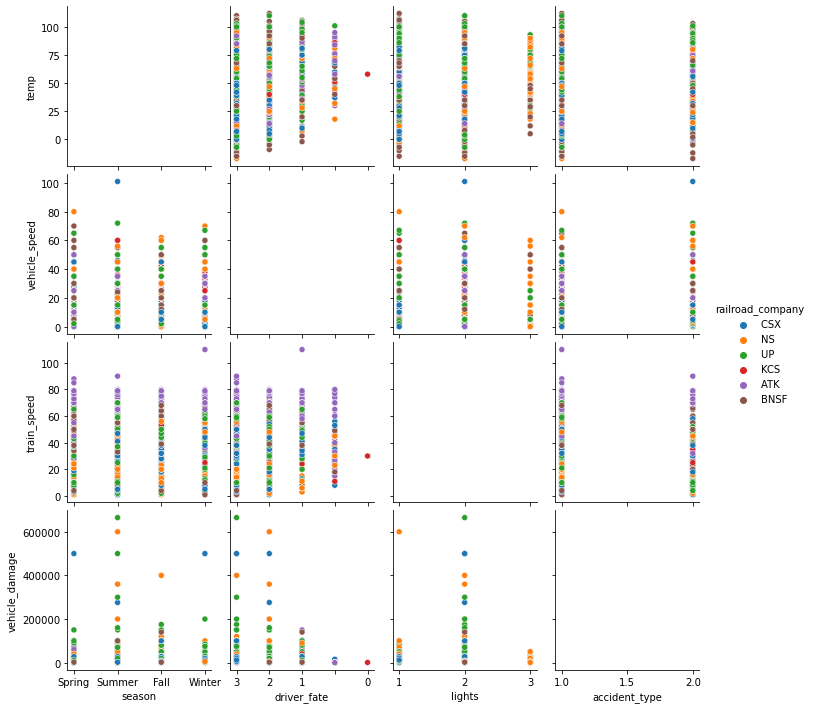

In [34]:
sns.pairplot(data = train, hue = 'railroad_company', 
             x_vars = ["season", "driver_fate", "lights", "accident_type"],
             y_vars = ["temp","vehicle_speed", "train_speed", "vehicle_damage"])

## Takeaways

- Crossings with no lights seem to have a higher frequency of incidents
- Summer is when a larger majority of incidents resulting in damages take place
- The temperature is almost always above 0 when fatal accidents occur

In [35]:
train.groupby('railroad_company').lights.value_counts()

railroad_company  lights
ATK               2         354
                  1         117
                  2          48
                  1           9
                  3           7
BNSF              2         823
                  1         289
                  2          98
                  1          32
                  3          28
                  3           3
CSX               2         872
                  1         516
                  2         112
                  1          81
                  3           1
KCS               2         214
                  2          28
                  1          11
NS                2         912
                  1         328
                  2         120
                  3         103
                  1          45
                  3          12
UP                2         977
                  1         457
                  2         129
                  1          51
                  3          39
               

In [ ]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="railroad_company", y="vehicle_damage", data=train, hue="lights", palette="Set2")
plt.legend()
plt.title('Railroad & Vehicle Property Damage Comparison')

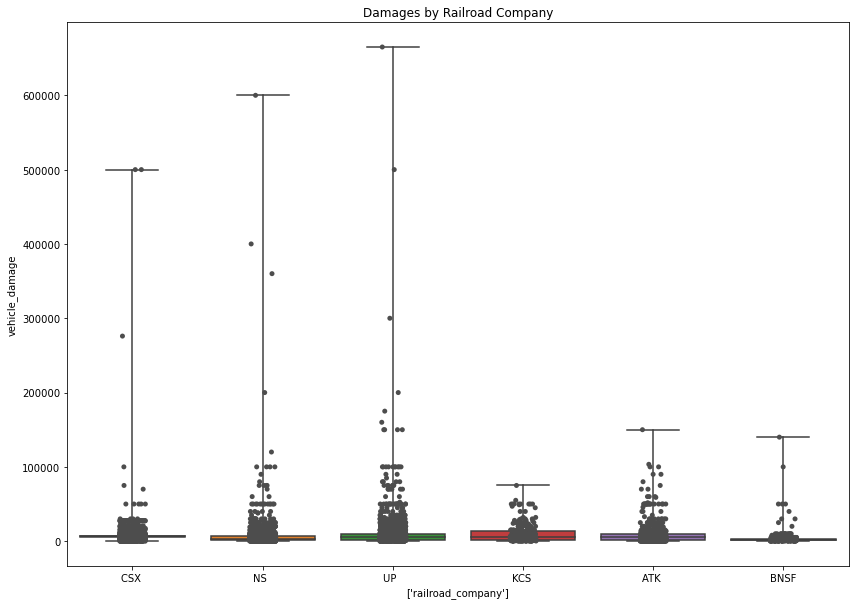

In [36]:

plt.figure(figsize=(14,10))



ax = sns.boxplot(x="railroad_company", y="vehicle_damage", data=train,whis=np.inf )
ax = sns.stripplot(x="railroad_company", y="vehicle_damage", data=train, color=".3")
ax.set_xlabel(['railroad_company'])
plt.title('Damages by Railroad Company')


plt.show()

## Takeaways

- Union Pacific appears to have the most incidents above 100,000 dollars in damages 
- KCS appears to have a concentration of incidents with damages less than 90,000 dollars
- Outliers needs to be dealt with

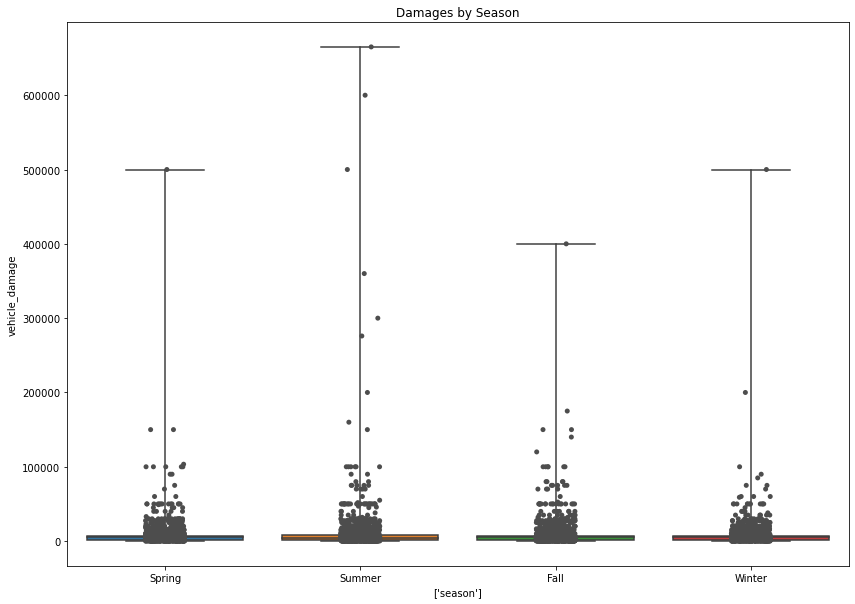

In [37]:

plt.figure(figsize=(14,10))



ax = sns.boxplot(x="season", y="vehicle_damage", data=train,whis=np.inf )
ax = sns.stripplot(x="season", y="vehicle_damage", data=train, color=".3")
ax.set_xlabel(['season'])
plt.title('Damages by Season')


plt.show()

## Takeaways

- Summer is an expensive month
- The other months appear to be more even but we would need to get rid of outliers to get a better visual representation

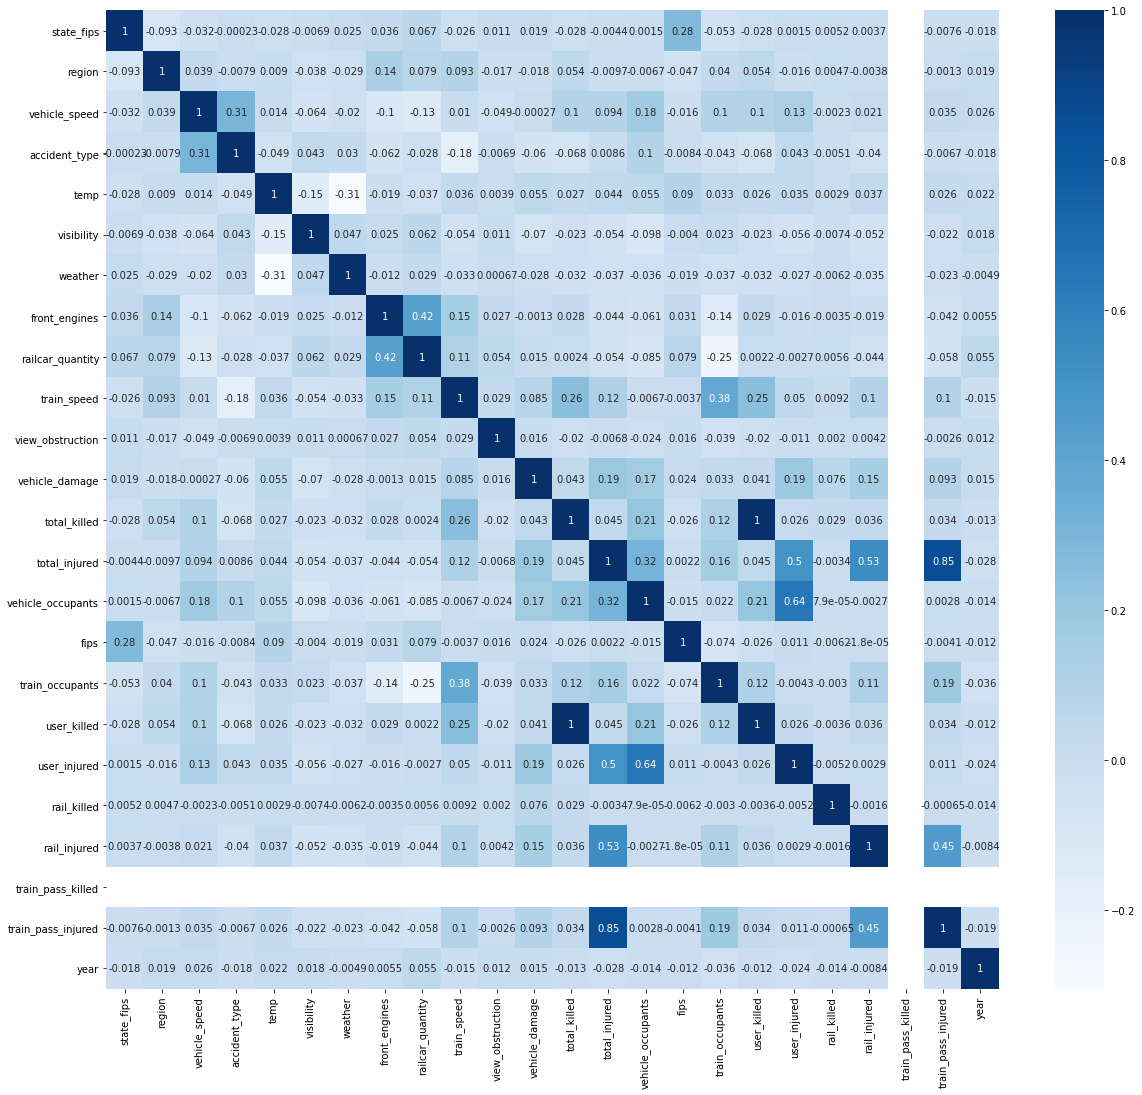

In [38]:

plt.figure(figsize=(20,18))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.show()

## Takeaways

- Not much strong or negative correation

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12181 entries, 0 to 12180
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   railroad_company    12181 non-null  object        
 1   station             12181 non-null  object        
 2   county              12181 non-null  object        
 3   state_fips          12181 non-null  int64         
 4   region              12181 non-null  int64         
 5   city                12181 non-null  object        
 6   vehicle_speed       12181 non-null  float64       
 7   vehicle_type        12181 non-null  object        
 8   vehicle_direction   12181 non-null  object        
 9   position            12181 non-null  object        
 10  accident_type       12181 non-null  int64         
 11  hazmat_entity       12181 non-null  object        
 12  temp                12181 non-null  int64         
 13  visibility          12181 non-null  int64     

train.groupby('ra

df.year = df.year.astype(object)

## Chi^2 Tests

<h3>Are accidents by rail company related to the season of year?</h3>

In [40]:
# Set our alpha
alpha = .05

In [41]:
# cross rail company vs season
observed = pd.crosstab(train.railroad_company, train.season)
observed

season,Fall,Spring,Summer,Winter
railroad_company,,,,
ATK,150,120,128,137
BNSF,347,274,336,316
CSX,387,394,386,415
KCS,69,62,68,54
NS,395,342,399,384
UP,437,367,438,415


In [42]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [43]:
null_hypothesis = "rail accidents by company is independent of season"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis that", null_hypothesis)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

We fail to reject the null hypothesis that rail accidents by company is independent of season
chi^2 = 12.7715
p     = 0.6199


<h3>Are accidents by rail company related to whether the crossing was lit by lights?</h3>

In [44]:
# Set our alpha
alpha = .05

In [45]:
# cross rail company vs lights
observed = pd.crosstab(train.railroad_company, train.lights)
observed

lights,1,2,3,1,2,3
railroad_company,,,,,,
ATK,117,354,7,9,48,0
BNSF,289,823,28,32,98,3
CSX,516,872,1,81,112,0
KCS,11,214,0,0,28,0
NS,328,912,103,45,120,12
UP,457,977,39,51,129,4


In [46]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [47]:
null_hypothesis = "rail accidents by company is independent of whether the intersection was lit"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

We reject the hypothesis that rail accidents by company is independent of whether the intersection was lit
chi^2 = 344.5678
p     = 0.0000


<h3>Are accidents by rail company related to the state where they occured?</h3>

In [48]:
# Set our alpha
alpha = .05

In [49]:
# cross rail company vs state
observed = pd.crosstab(train.railroad_company, train.state)
observed

state,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
railroad_company,,,,,,,,,,,,,,,,,,,,,
ATK,14,6,0,117,3,2,1,0,60,7,...,0,4,26,1,20,3,16,5,3,0
BNSF,8,27,59,92,50,0,0,0,0,0,...,28,11,225,0,0,0,73,14,0,15
CSX,151,0,0,0,0,1,1,2,132,191,...,0,90,0,0,43,0,0,0,56,0
KCS,0,11,0,0,0,0,0,0,0,0,...,0,1,82,0,0,0,0,0,0,0
NS,142,0,0,0,0,0,0,19,12,224,...,0,77,0,0,84,0,0,0,24,0
UP,0,137,25,166,49,0,0,0,0,0,...,0,0,573,16,0,0,25,22,0,10


In [50]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [51]:
null_hypothesis = "rail accidents by company is independent of the state they occured in"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

We reject the hypothesis that rail accidents by company is independent of the state they occured in
chi^2 = 9481.0323
p     = 0.0000


<h3>Is the fate of the driver (not-injured, injured, killed) related to the rail company involved?</h3>

In [52]:
# Set our alpha
alpha = .05

In [53]:
# cross rail company vs driver fate
observed = pd.crosstab(train.railroad_company, train.driver_fate)
observed

driver_fate,,0,1,2,3
railroad_company,,,,,
ATK,33,0,102,120,280
BNSF,9,0,125,338,801
CSX,15,0,95,432,1040
KCS,2,1,17,72,161
NS,21,0,87,362,1050
UP,1,0,126,438,1092


In [54]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [55]:
null_hypothesis = "A drivers fate in an accident is independent of what rail company was involved in the accident"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

We reject the hypothesis that A drivers fate in an accident is independent of what rail company was involved in the accident
chi^2 = 289.5451
p     = 0.0000


# Modeling

In [3]:
df = prep_hwy_df(df)

In [4]:
df = get_dummies(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12181 entries, 0 to 12180
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   railroad_company    12181 non-null  object        
 1   station             12181 non-null  object        
 2   county              12181 non-null  object        
 3   state_fips          12181 non-null  int64         
 4   region              12181 non-null  int64         
 5   city                12181 non-null  object        
 6   vehicle_speed       12181 non-null  float64       
 7   vehicle_type        12181 non-null  object        
 8   vehicle_direction   12181 non-null  object        
 9   position            12181 non-null  object        
 10  accident_type       12181 non-null  int64         
 11  hazmat_entity       12181 non-null  object        
 12  temp                12181 non-null  int64         
 13  visibility          12181 non-null  int64     

In [21]:
hwydf = df[['railroad_company', 'fips', 'railcar_quantity', 'vehicle_damage']]
hwydf.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12181 entries, 0 to 12180
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   railroad_company  12181 non-null  object 
 1   fips              12181 non-null  int64  
 2   railcar_quantity  12181 non-null  int64  
 3   vehicle_damage    12181 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 475.8+ KB


In [ ]:
hwydf.weather = pd.to_numeric(hwydf.weather, errors='coerce').fillna(0).astype(int)

In [ ]:
hwydf.lights = pd.to_numeric(hwydf.lights, errors='coerce').fillna(0).astype(int)

In [ ]:
hwydf.driver_fate = pd.to_numeric(hwydf.driver_fate, errors='coerce').fillna(0).astype(int)

In [ ]:
hwydf.motorist_action = pd.to_numeric(hwydf.motorist_action, errors='coerce').fillna(0).astype(int)

In [ ]:
hwydf.whistle_ban = pd.to_numeric(hwydf.whistle_ban, errors='coerce').fillna(0).astype(int)

In [22]:
train, validate, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(hwydf, 'railroad_company')

In [23]:
X_train.shape, X_validate.shape, X_test.shape

((6820, 3), (2924, 3), (2437, 3))

In [24]:
object_cols = get_object_cols(hwydf)

In [25]:
numeric_cols = get_numeric_X_cols(X_train, object_cols)

In [26]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [27]:
X_train_scaled

,fips,railcar_quantity,vehicle_damage
2108,0.290363,0.342776,0.001333
1914,0.145181,0.410765,0.008667
6197,0.002503,0.246459,0.015467
7030,0.195244,0.110482,0.002267
420,0.035044,0.169972,0.002667
...,...,...,...
9383,0.122653,0.025496,0.001333
2434,0.120150,0.147309,0.004000
6351,0.165207,0.260623,0.020000
3450,0.042553,0.161473,0.013333


## Baseline

In [28]:
df.railroad_company.value_counts()

UP      2959
CSX     2825
NS      2715
BNSF    2274
ATK      956
KCS      452
Name: railroad_company, dtype: int64

In [29]:
print(f'Baseline Accuracy: {round(max(df.railroad_company.value_counts()) / df.shape[0] *100)}%')

Baseline Accuracy: 24%


--------

## Logistic Regression

-----------

In [30]:
#Using the scaled data, make a logistic regression model
lm = LogisticRegression()

#Fit the lm object to the vectorized data
lm.fit(X_train_scaled, y_train)

#Create corresponding dataframes 
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

#Form predictions uisng the lm model
train['predicted'] = lm.predict(X_train_scaled)
validate["predicted"] = lm.predict(X_validate_scaled)
test['predicted'] = lm.predict(X_test_scaled)

#Review how the lm model performed on the in-sample data
print('In-sample data model performance:')
print(classification_report(train.actual, train.predicted, zero_division=0))
print('----------------')
#Review how the lm model performed on the out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(validate.actual, validate.predicted, zero_division=0))

In-sample data model performance:
              precision    recall  f1-score   support

        ATK        0.02      0.01      0.01       536
        BNSF       0.00      0.00      0.00      1246
        CSX        0.24      0.11      0.15      1553
        KCS        0.00      0.00      0.00       251
        NS         0.26      0.45      0.33      1513
        UP         0.32      0.62      0.42      1721

    accuracy                           0.28      6820
   macro avg       0.14      0.20      0.15      6820
weighted avg       0.20      0.28      0.22      6820

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

        ATK        0.05      0.01      0.02       241
        BNSF       0.00      0.00      0.00       567
        CSX        0.27      0.13      0.18       705
        KCS        0.00      0.00      0.00       104
        NS         0.26      0.47      0.33       647
        UP         0.29      0.61      0.40

-------

## KNN

----------

In [31]:
#Create the KNN object with a k = 5
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

#Fit the object to the scaled training data
knn.fit(X_train_scaled, y_train)

#Create corresponding dataframes 
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

#Form predictions uisng the knn model
train['predicted'] = knn.predict(X_train_scaled)
validate["predicted"] = knn.predict(X_validate_scaled)

#Review how the knn model performed on the in-sample data
print('In-sample data model performance:')
print(classification_report(train.actual, train.predicted,  zero_division=0))
print('----------------')
#Review how the knn model performed on the out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(validate.actual, validate.predicted, zero_division=0))

In-sample data model performance:
              precision    recall  f1-score   support

        ATK        0.97      1.00      0.99       536
        BNSF       0.97      1.00      0.99      1246
        CSX        0.99      0.99      0.99      1553
        KCS        0.99      0.99      0.99       251
        NS         0.99      0.98      0.99      1513
        UP         1.00      0.98      0.99      1721

    accuracy                           0.99      6820
   macro avg       0.99      0.99      0.99      6820
weighted avg       0.99      0.99      0.99      6820

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

        ATK        0.58      0.68      0.63       241
        BNSF       0.40      0.40      0.40       567
        CSX        0.41      0.41      0.41       705
        KCS        0.09      0.03      0.04       104
        NS         0.33      0.30      0.31       647
        UP         0.41      0.46      0.43

--------

## Random Forest

--------

In [32]:
#Create the RF object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

#Fit the RF object to the training data
rf.fit(X_train_scaled, y_train)

#Predict on y
y_pred = rf.predict(X_train_scaled)

#Evaluate on train
print('In-sample data model performance:')
print(classification_report(y_train, y_pred))


#Predict using out of sample data
y_pred = rf.predict(X_validate_scaled)
print('----------------')
print('Out-of-sample data model performance:')
print(classification_report(y_validate, y_pred, zero_division=0))

In-sample data model performance:
              precision    recall  f1-score   support

        ATK        0.67      0.89      0.77       536
        BNSF       0.70      0.76      0.73      1246
        CSX        0.90      0.69      0.78      1553
        KCS        0.95      0.08      0.15       251
        NS         0.59      0.67      0.63      1513
        UP         0.67      0.72      0.69      1721

    accuracy                           0.70      6820
   macro avg       0.75      0.64      0.63      6820
weighted avg       0.72      0.70      0.69      6820

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

        ATK        0.58      0.79      0.67       241
        BNSF       0.62      0.66      0.64       567
        CSX        0.79      0.58      0.67       705
        KCS        0.00      0.00      0.00       104
        NS         0.49      0.53      0.51       647
        UP         0.51      0.60      0.55

---------

## Decision Tree

-----------

In [33]:
#Make the CLF object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=123)

#Fit the model on the training set 
clf = clf.fit(X_train_scaled, y_train)

#Make predictions
y_pred = clf.predict(X_train_scaled)

#Evaluate model performance on training data
print('In-sample data model performance:')
print(classification_report(y_train, y_pred))

# Predict on validate
y_pred = clf.predict(X_validate_scaled)

# Evaluate model performance on out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(y_validate, y_pred, zero_division=0))

In-sample data model performance:
              precision    recall  f1-score   support

        ATK        0.45      0.95      0.61       536
        BNSF       0.63      0.65      0.64      1246
        CSX        0.89      0.48      0.62      1553
        KCS        0.00      0.00      0.00       251
        NS         0.41      0.52      0.45      1513
        UP         0.49      0.46      0.48      1721

    accuracy                           0.53      6820
   macro avg       0.48      0.51      0.47      6820
weighted avg       0.57      0.53      0.53      6820

Out-of-sample data model performance:
              precision    recall  f1-score   support

        ATK        0.45      0.92      0.60       241
        BNSF       0.63      0.64      0.64       567
        CSX        0.88      0.47      0.61       705
        KCS        0.00      0.00      0.00       104
        NS         0.41      0.53      0.46       647
        UP         0.48      0.46      0.47       660

    a

In [34]:
#Predict on y
y_pred = rf.predict(X_test_scaled)

#Evaluate
print('In-sample data model performance:')
print(classification_report(y_test, y_pred))

In-sample data model performance:
              precision    recall  f1-score   support

        ATK        0.59      0.83      0.69       179
        BNSF       0.63      0.70      0.67       461
        CSX        0.80      0.60      0.69       567
        KCS        0.33      0.01      0.02        97
        NS         0.47      0.53      0.49       555
        UP         0.50      0.54      0.52       578

    accuracy                           0.58      2437
   macro avg       0.55      0.54      0.51      2437
weighted avg       0.59      0.58      0.57      2437



-------

## Takeaways

----------

## Conclusion and Next Steps
- The fact that there were not any distinguishing characteristics of equipment rail accidents for predicting the railroad company involved in an incident is encouraging!
- It signifies that no one company is acting with more or less negligence / risk than any other railroad company. At least in a manner that is statistically significant.
- The next steps are to see if there are features that would assist in predicting total damages of an equipment rail incident.